# TITANIC - BRUNET DORE NAHON SIMCIC--MORI

In [1]:
library(lattice)
library(ggplot2)
library(bestglm)
library(MASS)
#library(partykit)
library(randomForest)
library(rpart)
library(missForest)
library(FactoMineR)
library(factoextra)

Loading required package: leaps

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: foreach

Loading required package: itertools

Loading required package: iterators

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



# A : Stats descriptive, intéractions

Let us have a look to the 'train' dataset. 

In [2]:
x <- read.csv('titanicTrain.csv')
str(x)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [3]:
summary(x)

  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

Conversion to class 'Factor' for qualitative variables 'Survived', 'Pclass'

In [4]:
x$Survived <- as.factor(x$Survived)
levels(x$Survived)
levels(x$Survived) <- c("dead", "alive")
x$Pclass <- as.factor(x$Pclass)
levels(x$Pclass)
levels(x$Pclass) <- paste("class", 1:3)
str(x)

[1] "0" "1"

[1] "1" "2" "3"

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : Factor w/ 2 levels "dead","alive": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass     : Factor w/ 3 levels "class 1","class 2",..: 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


### Remarques:
Dans ce data set:

8 variables qualitatives: Survived, Pclass, Name, Embarked, Sex, Ticket, Cabin, PassengerId (numéro de l'individu)

4 varibales quantitatives: Age, SibSp, Parch, Fare

2 modalités pour Survived, notre variable binaire (réponse)

3 modalités pour Pclass

## Data exploration

## Analyse Unidimensionnelle : 

### Variables qualitatives


 dead alive 
  549   342 

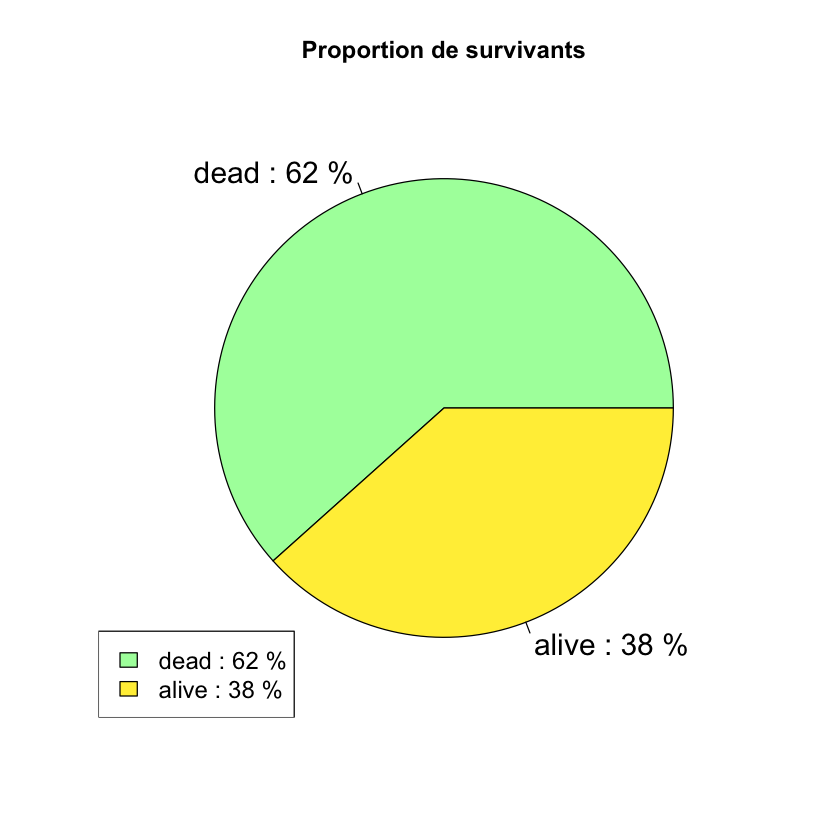

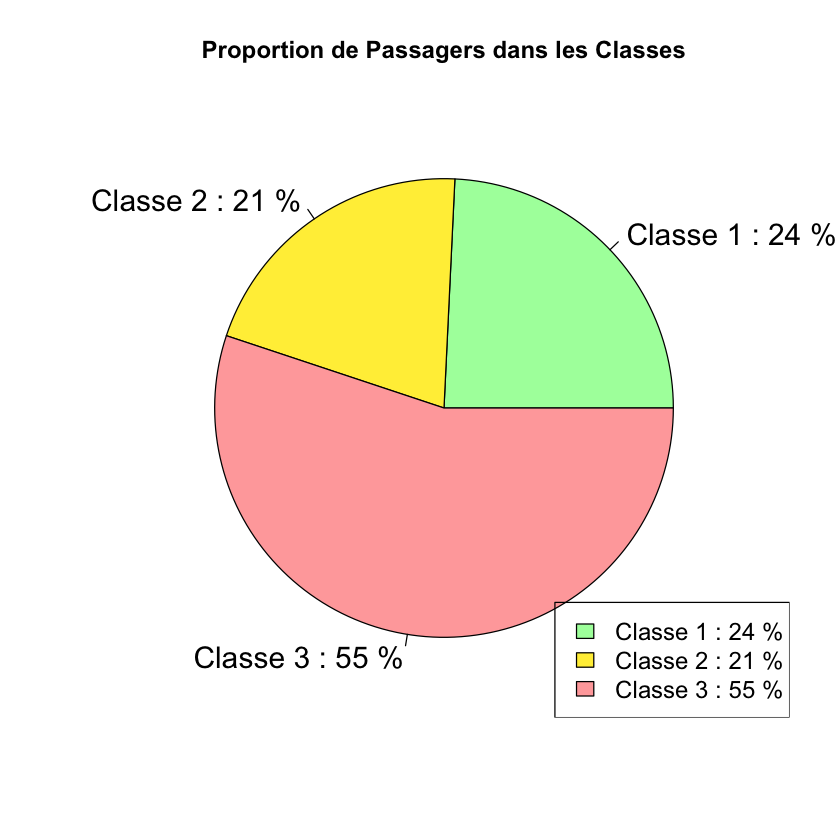

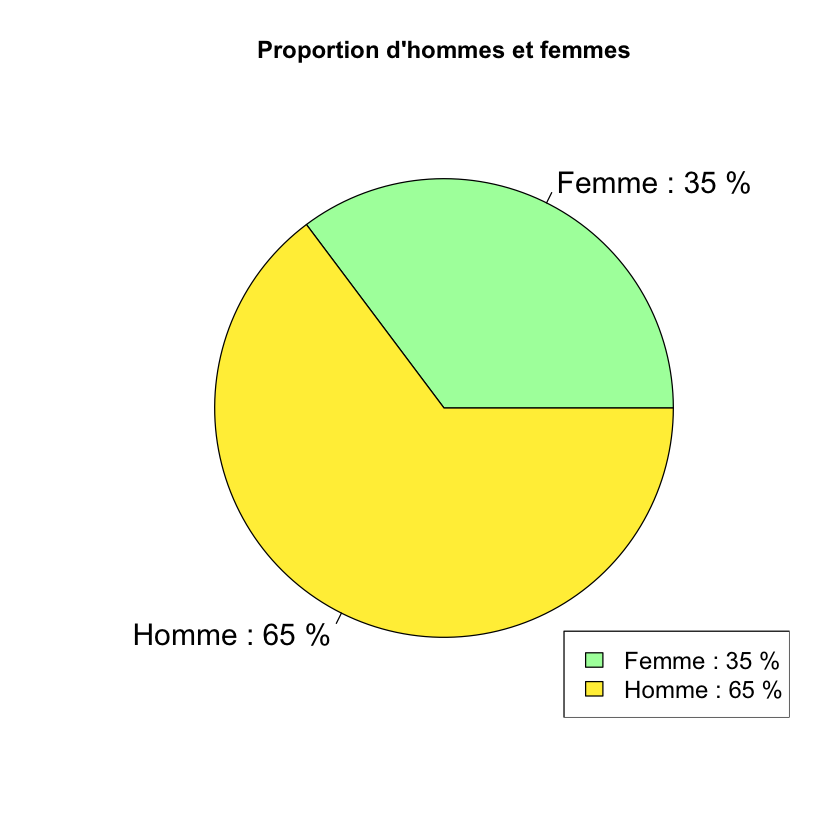

In [5]:
table(x$Survived)
#par.default <- par(mfrow = c(2, 2))
#pie(table(x$Survived),main="Proportion de survivants")
total = length(x$Survived)
pct = round(table(x$Survived)/total*100)
lbls <- paste(c("dead","alive"), ":" , pct, "%")
pie(table(x$Survived),col=c("#AAFFAA","#FFEE44"),labels= lbls, main="Proportion de survivants",cex=1.5)
legend(x="bottomleft", legend=lbls, cex=1.2, fill=c("#AAFFAA","#FFEE44"))


total = length(x$Pclass)
pct= round(table(x$Pclass)/total*100)
lbls <- paste("Classe", 1:3, ":" , pct, "%")
pie(table(x$Pclass),col=c("#AAFFAA","#FFEE44","#FFAAAA"),labels= lbls, main="Proportion de Passagers dans les Classes",cex=1.5)
legend(x="bottomright", legend=lbls, cex=1.2, fill=c("#AAFFAA","#FFEE44","#FFAAAA"))


total = length(x$Sex)
pct = round(table(x$Sex)/total*100)
lbls <- paste(c("Femme","Homme"), ":" , pct, "%")
pie(table(x$Sex),col=c("#AAFFAA","#FFEE44"),labels= lbls, main="Proportion d'hommes et femmes",cex=1.5)
legend(x="bottomright", legend=lbls, cex=1.2, fill=c("#AAFFAA","#FFEE44"))

### Remarques:
On observe: 
- une plus grande proportion d'individus à la modalité "dead" ie plus de morts que de survivants.
- que la majorité des passagers sont des hommes
- que la majorité des passagers sont de la classe3 (la plus pauvre)
   

### Variables quantitatives


  0   1   2   3   4   5   6 
678 118  80   5   4   5   1 

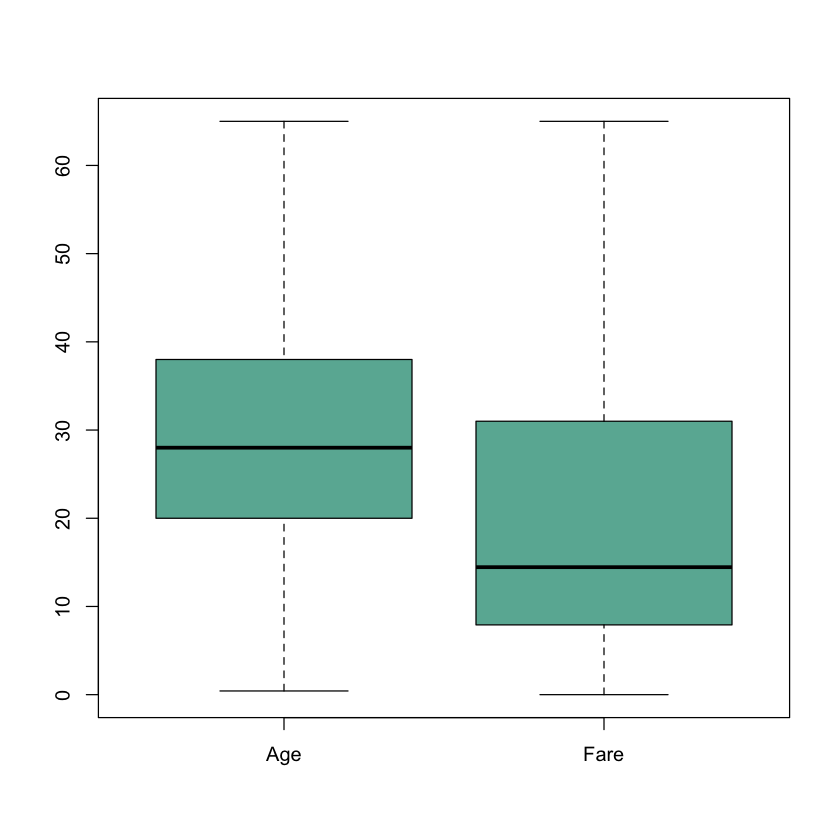

In [6]:
boxplot(x$Age,x$Fare,names = c("Age", "Fare"), col="#69b3a2" ,outline =FALSE)
#boxplot(x$SibSp, outline =FALSE)
table(as.factor(x$Parch))

### Remarques:

On observe que beaucoup des passagers étaient sur le bateau sans Parents : 678 (lien de parentés verticaux) 

Les boxplots des Age et Fare ne permettent pas a priori d'établir une quelconque conclusion.

Poursuivons notre étude ci-dessous


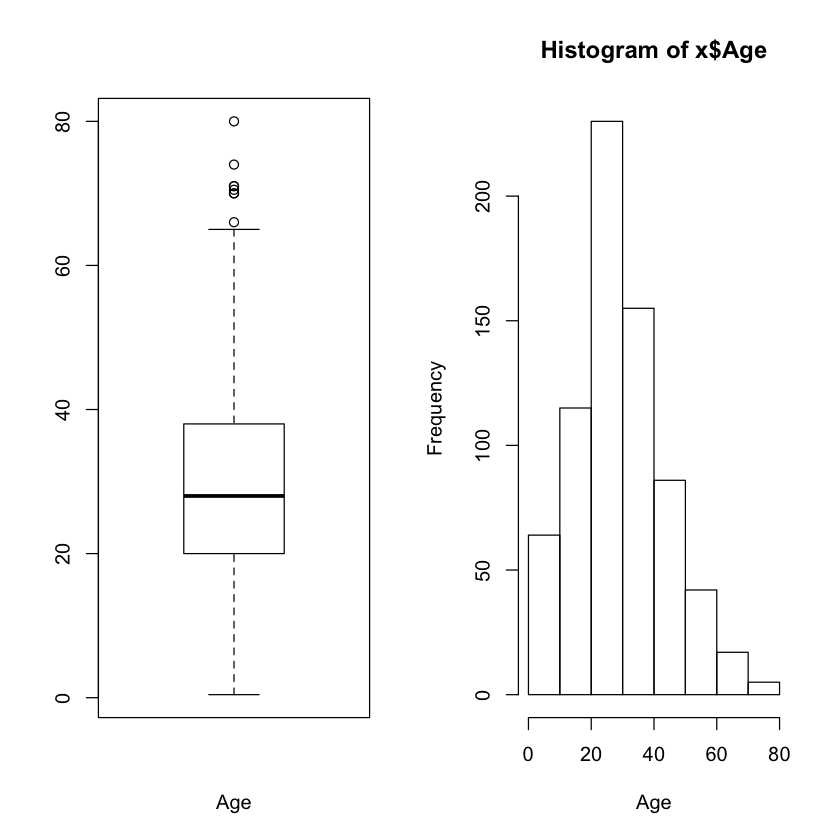

In [7]:
par.default <- par(mfrow = c(1, 2))
boxplot(x$Age, xlab ="Age")
hist(x$Age, xlab = "Age")

### Remarques:

On remarque que:
- la majorité des passagers a entre 20 et 30 ans(cf histogramme) 
- l'âge médian semble être autour de 28 ans


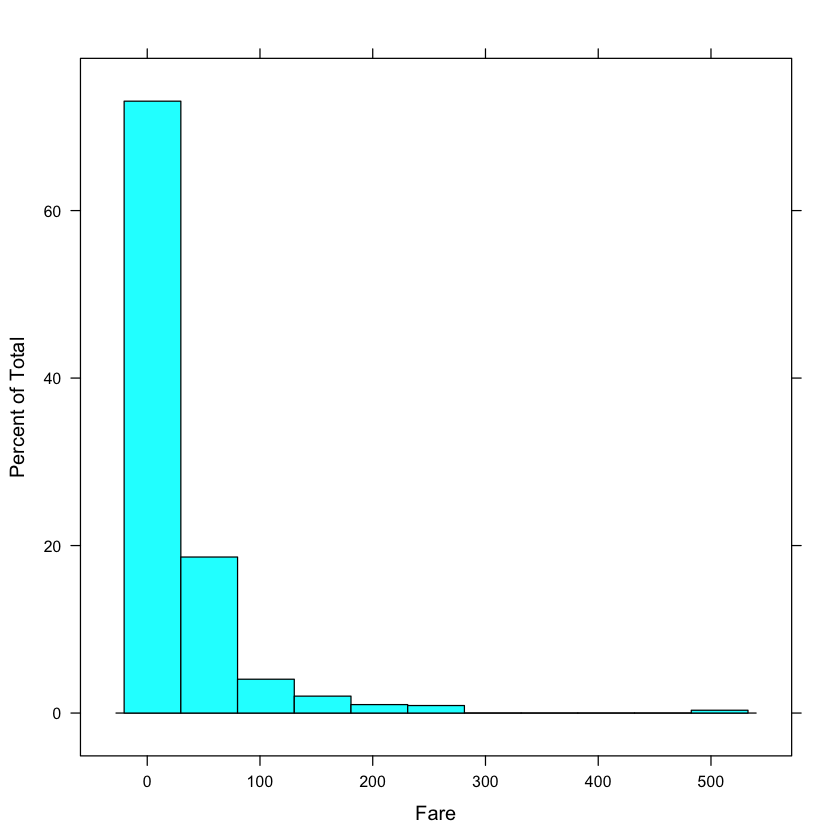

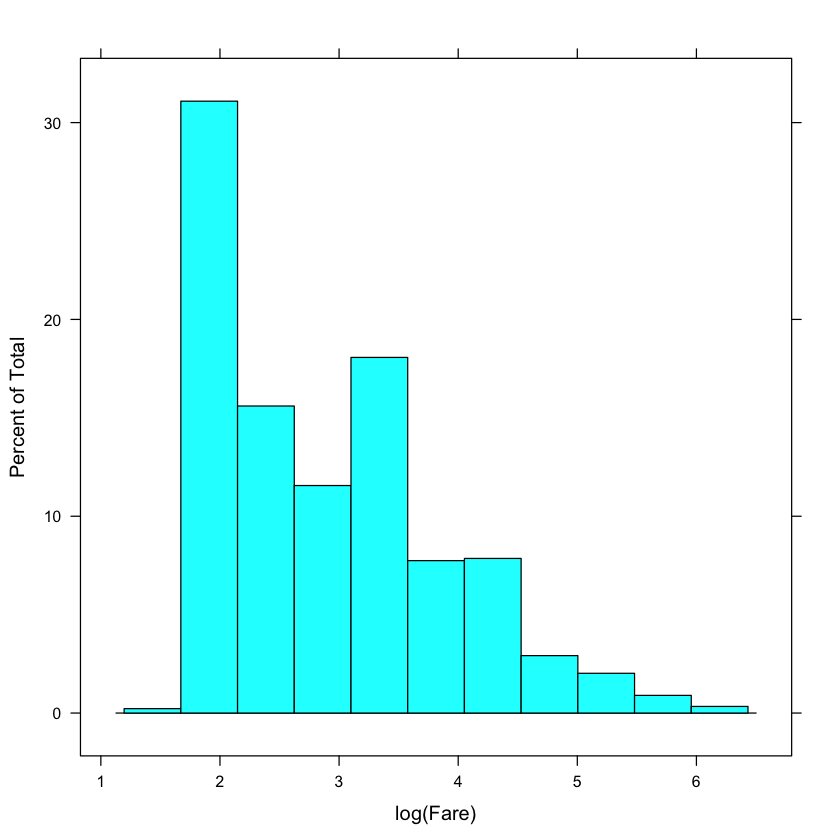

factor_SibSp
  0   1   2   3   4   5   8 
608 209  28  16  18   5   7 

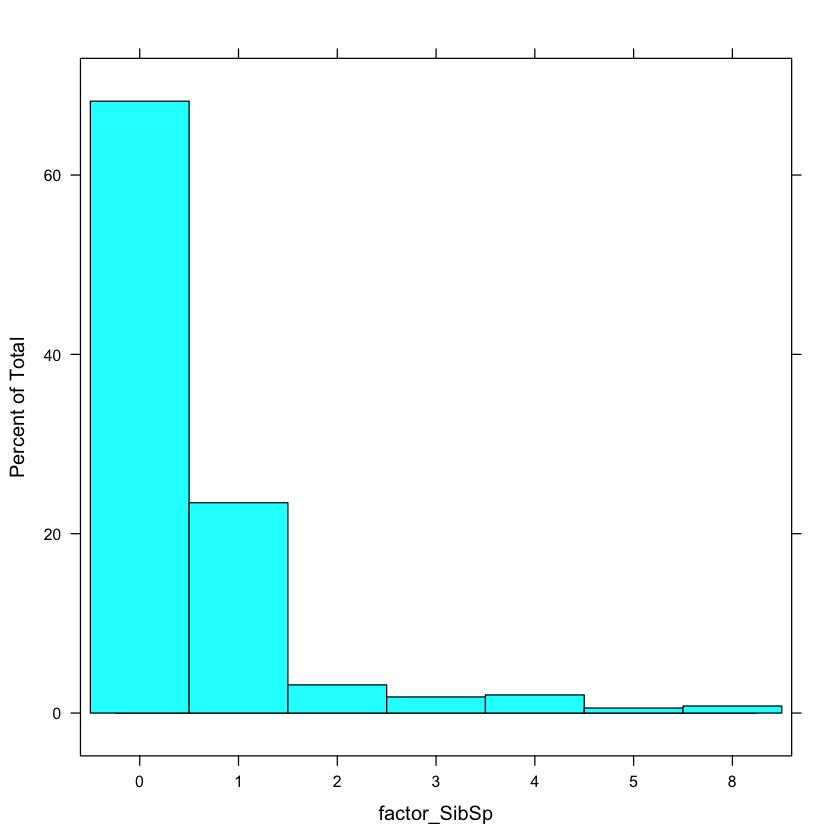

In [8]:
histogram(~Fare , data=x) #On observe des faibles valeurs, regardons log(fare)
histogram(~log(Fare) , data=x)
factor_SibSp = as.factor(x$SibSp)
histogram(factor_SibSp)
table(factor_SibSp)

### Remarques:

On observe que beaucoup des passagers étaient sur le bateau sans frère et sœur ni épouse : 678 (lien de parentés horizontaux) 

Par ailleurs, en voulant observer l'étendue de prix des tickets (variable Fare) nous nous sommes rendus compte qu'appliquer une transformation logarithmique était plus judicieuse. Ainsi nous observons une grande proportion de passagers n'ont pas payé cher leur tickets (peut-être l'équipage ou des invitations)

## Analyse Multi-dimensionnelle : 

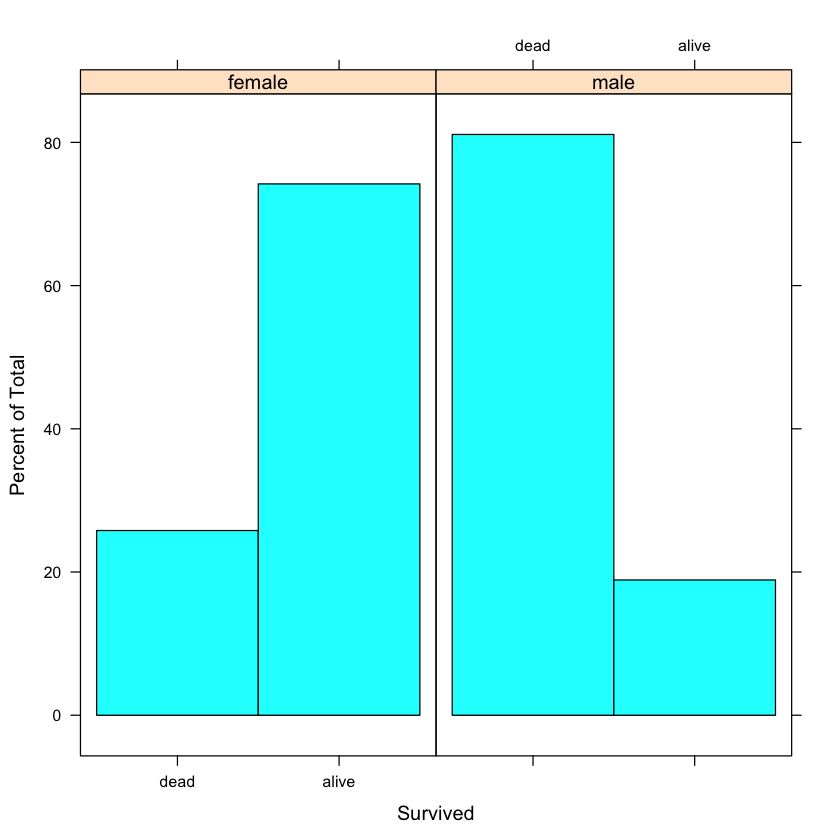

       
        female male
  dead      81  468
  alive    233  109

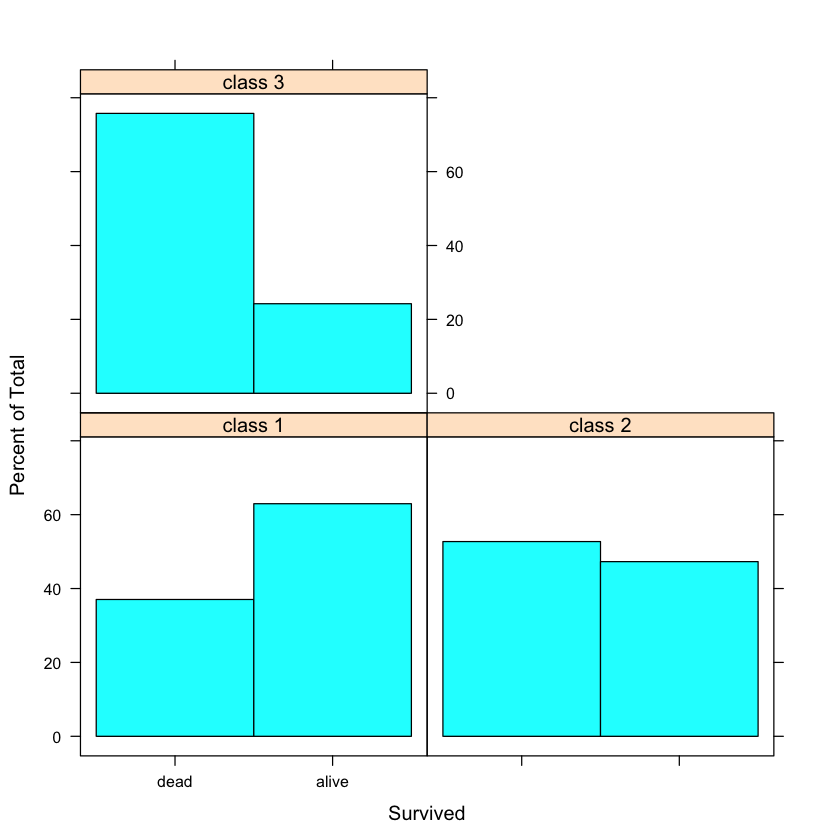

In [9]:
histogram(~Survived | Sex, data=x)
histogram(~Survived | Pclass, data=x)
table(x$Survived, x$Sex)

### Remarques:

On remarque directement sur ces deux treillis que l'effet de genre a une grande importance sur la variable Survived. Les hommes ont davantage péri dans le naufrage par rapport aux femmes. Le nombre de femmes vivantes représentent plus du double d'hommes vivants alors que la proportion de femmes initiale était nettement inférieure à celle des hommes. (cf plus haut)

On tire les mêmes conclusions concernant les classes: plus la classe est élevée plus la proportion d'invidus ayant survécu est grande. Seule la classe 1 a une proportion de survivants supérieure aux morts. 

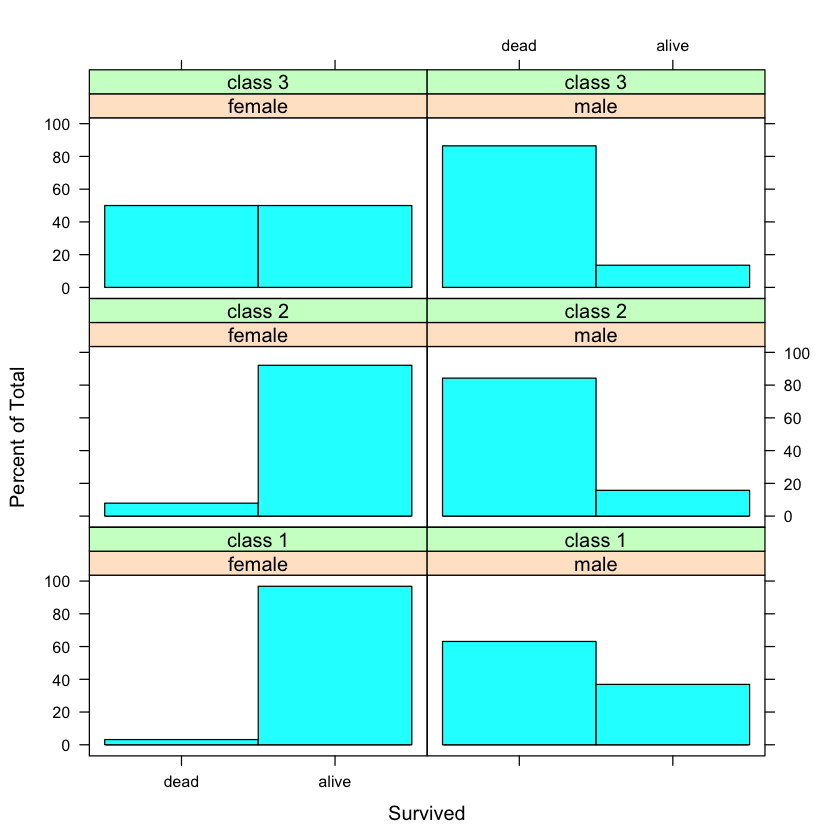

In [10]:
histogram(~Survived | Sex * Pclass, data = x)

### Remarques:

En lisant de haut en bas chaque colonne, on observe une forte influence de la classe chez les femmes, cette différence est moins marquée chez les hommes. De plus, en comparant la colonne de gauche et celle de droite on remarque toujours l'effet du genre.

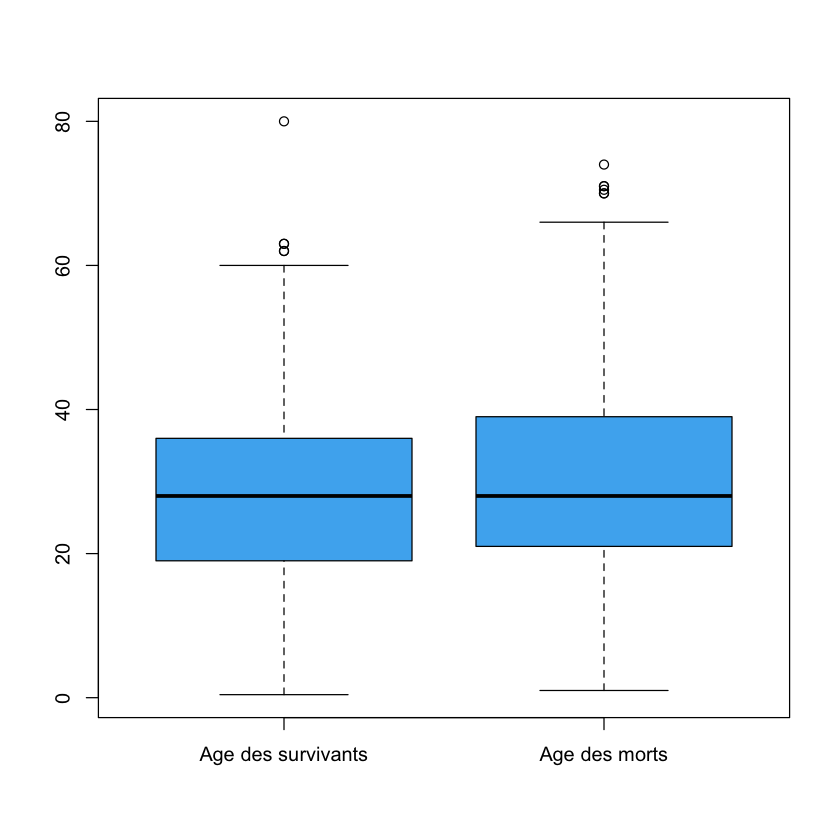

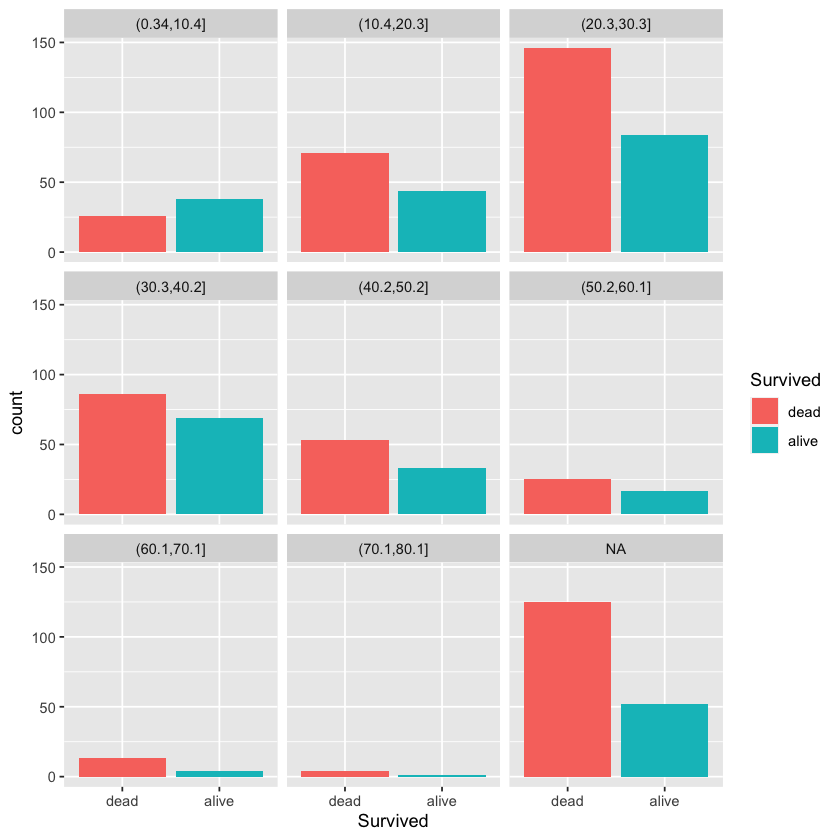

In [11]:
#par.default <- par(mfrow = c(1, 2))
boxplot(x$Age[x$Survived == "alive"],x$Age[x$Survived == "dead"] , names = c("Age des survivants", "Age des morts"), col="#4CB2F0")# ,outline =FALSE)
ggplot(data = x, mapping = aes(x = Survived, fill = Survived)) + geom_bar(position ="dodge") + facet_wrap(~(cut(Age,8))) 


### Remarques:

Boxplot : On observe que les individus portant la modalité "dead" sont legèrement plus agés.

ggplot : Seuls les individus de bas ages ont une proportion de survivant plus élevée.

On remarque également beaucoup de données manquantes dans âge, regardons sa proportion

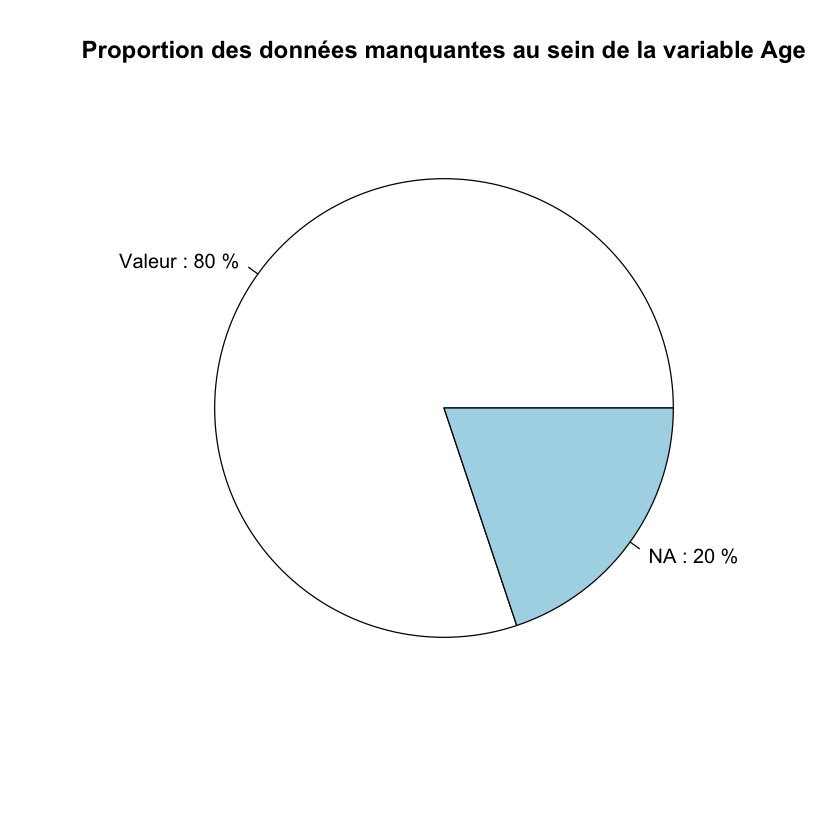

In [12]:
perc_NA = x$Age
perc_NA[-which(is.na(perc_NA))] = 0
perc_NA[which(is.na(perc_NA))] = 1
perc_NA = as.factor(perc_NA)
total = length(perc_NA)
pct= round(table(perc_NA)/total*100)
levels(perc_NA) <- c("Valeur","NA")
lbls <- paste( levels(perc_NA), ":" , pct, "%")
pie(table(perc_NA),labels=lbls, main= "Proportion des données manquantes au sein de la variable Age")



### Remarques:

On observe qu'il y a 1/5 des données manquantes. C'est non négligeable, nous allons voir comment compléter ces données manquantes dans une prochaine partie.

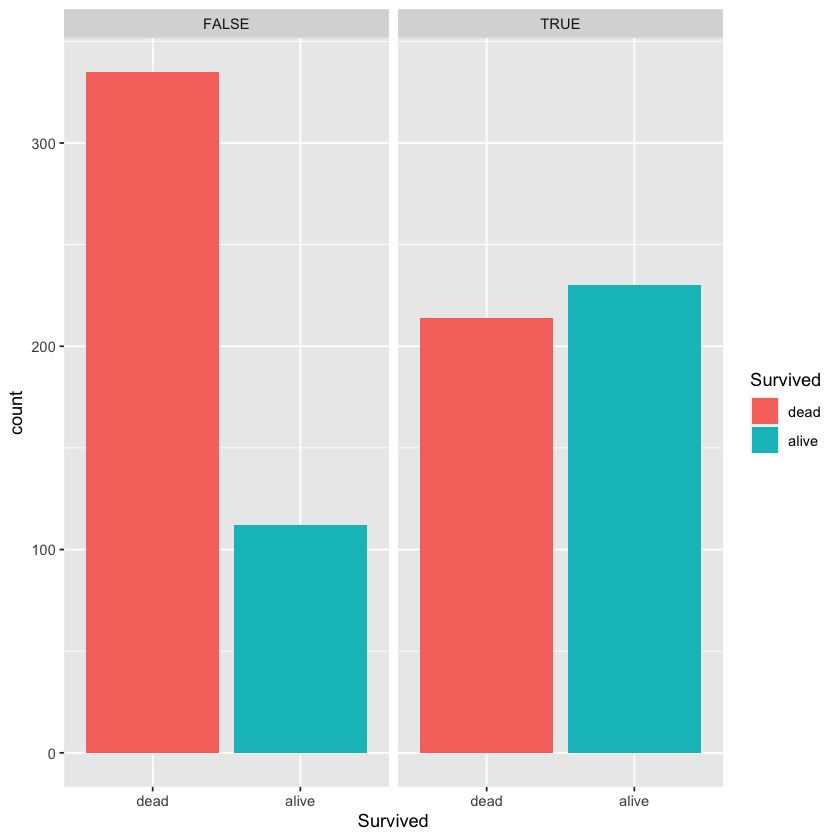

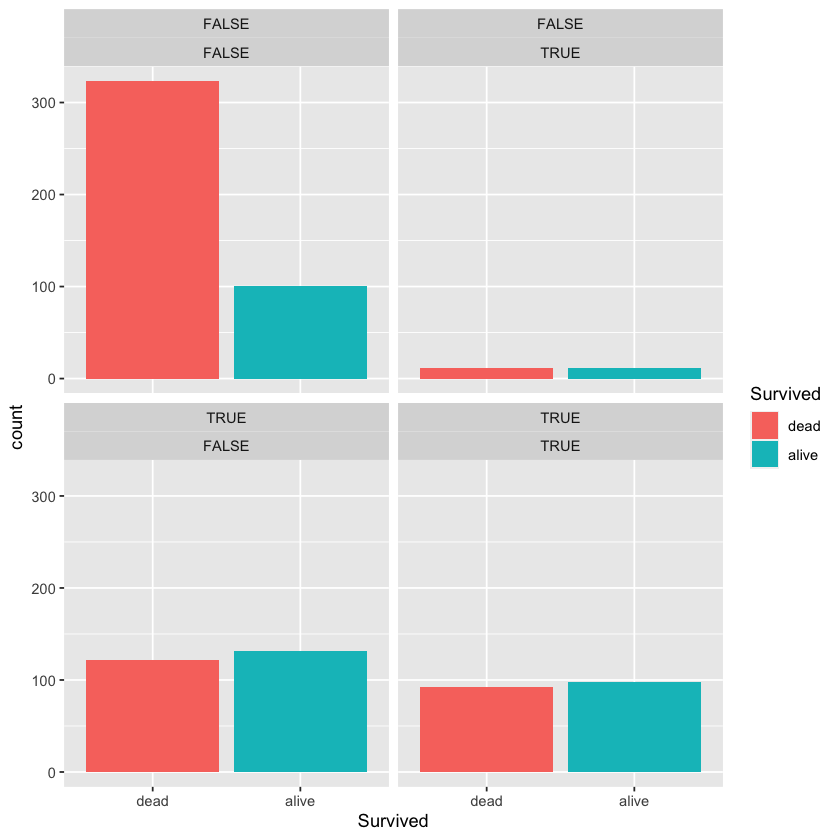

In [13]:
ggplot(data = x, mapping = aes(x = Survived, fill = Survived)) + geom_bar(position ="dodge") + facet_wrap(~(Fare>median(Fare)))
ggplot(data = x, mapping = aes(x = Survived, fill = Survived)) + geom_bar(position ="dodge") + facet_wrap(~(Fare>median(Fare))+(Parch>median(Parch)))


### Remarques:

- On remarque que la proportion d'invidu ayant survécu est plus grande pour les individus ayant payé leur ticket au dessus du prix médian.

- On remarque que pour les individus n'ayant pas de Parents, la survie dépend du prix du billet: peut-être de la classe.



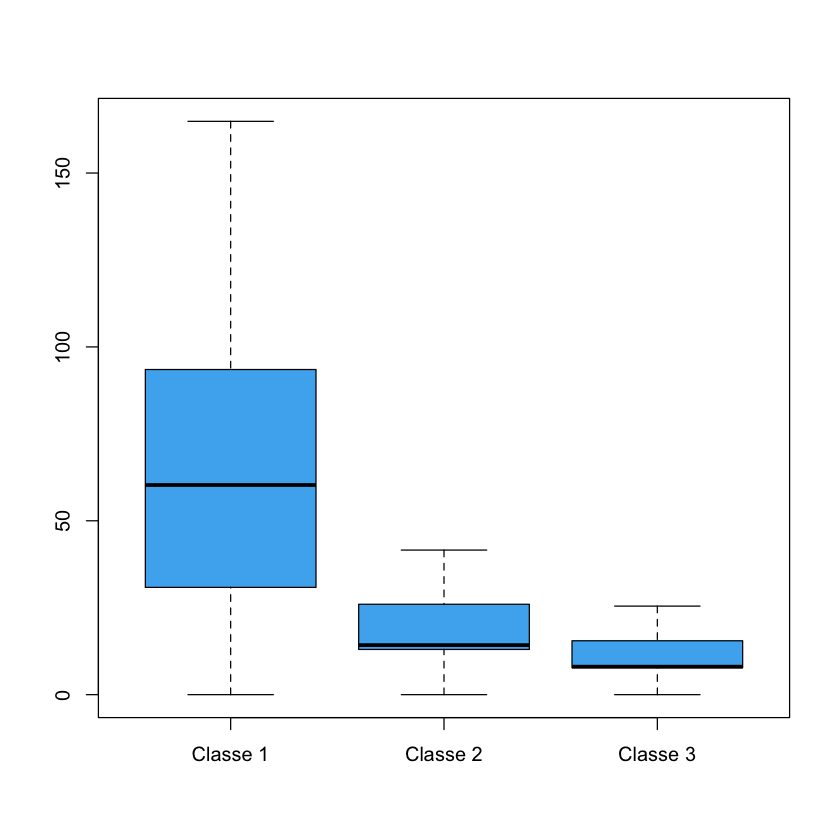

In [14]:
boxplot(x$Fare[x$Pclass == "class 1"],x$Fare[x$Pclass == "class 2"],x$Fare[x$Pclass == "class 3"] , names = c("Classe 1", "Classe 2", "Classe 3"), col="#4CB2F0" ,outline =FALSE)



### Remarques:

- On remarque que plus la classe est élevée, plus les prix sont élevés. Cette corrélation est logique avec ce que l'on pourrait penser.

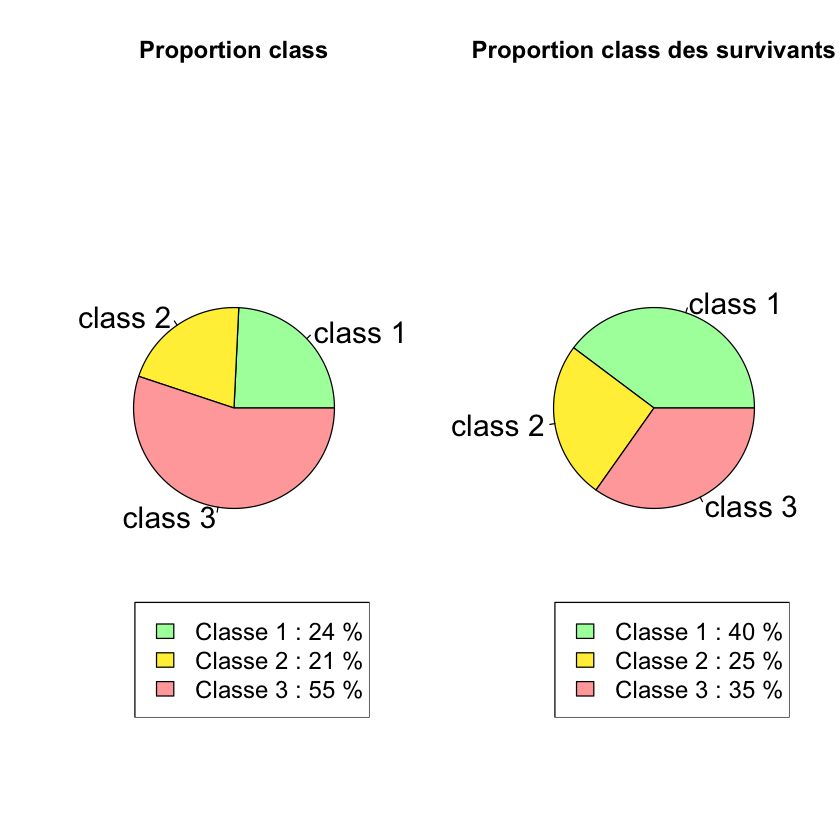

In [15]:
par.default <- par(mfrow = c(1, 2))
cap = x$Pclass[(x$Survived=="alive")] #legende + proportion
#pie(table(cap))
total = length(x$Pclass)
pct= round(table(x$Pclass)/total*100)
lbls <- paste("Classe", 1:3, ":" , pct, "%")
pie(table(x$Pclass),col=c("#AAFFAA","#FFEE44","#FFAAAA"),cex=1.5,main= "Proportion class")
legend(x="bottomright", legend=lbls, cex=1.2, fill=c("#AAFFAA","#FFEE44","#FFAAAA"))


total = length(cap)
pct= round(table(cap)/total*100)
lbls <- paste("Classe", 1:3, ":" , pct, "%")
pie(table(cap),col=c("#AAFFAA","#FFEE44","#FFAAAA"), cex=1.5, main= "Proportion class des survivants")
legend(x="bottomright", legend=lbls, cex=1.2, fill=c("#AAFFAA","#FFEE44","#FFAAAA"))


### Remarques:

On observe que la proportion des survivants de la classe 1 est de 40% alors que cette classe représente 24% de la population globale. Pour la classe 3 qui est majoritaire sur l'ensemble de la population (55%) cette proportion diminue si on ne regarde que les surivants (35%).


On en conclut que la variable Pclass a un fort impact sur le taux de survie. La classe 1 est privilégiée parmi les survivants

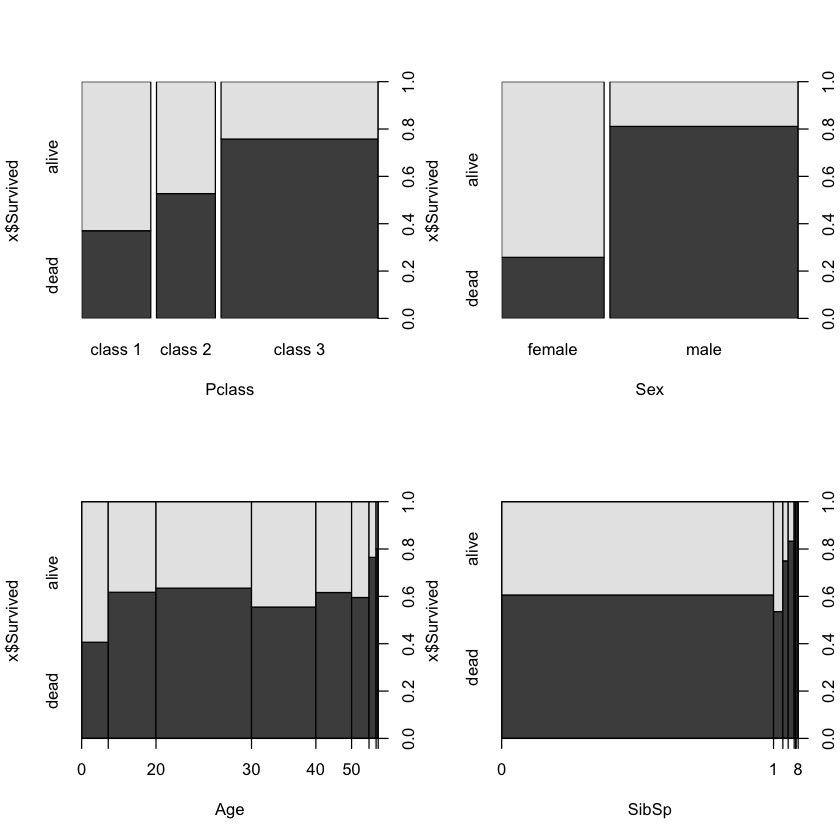

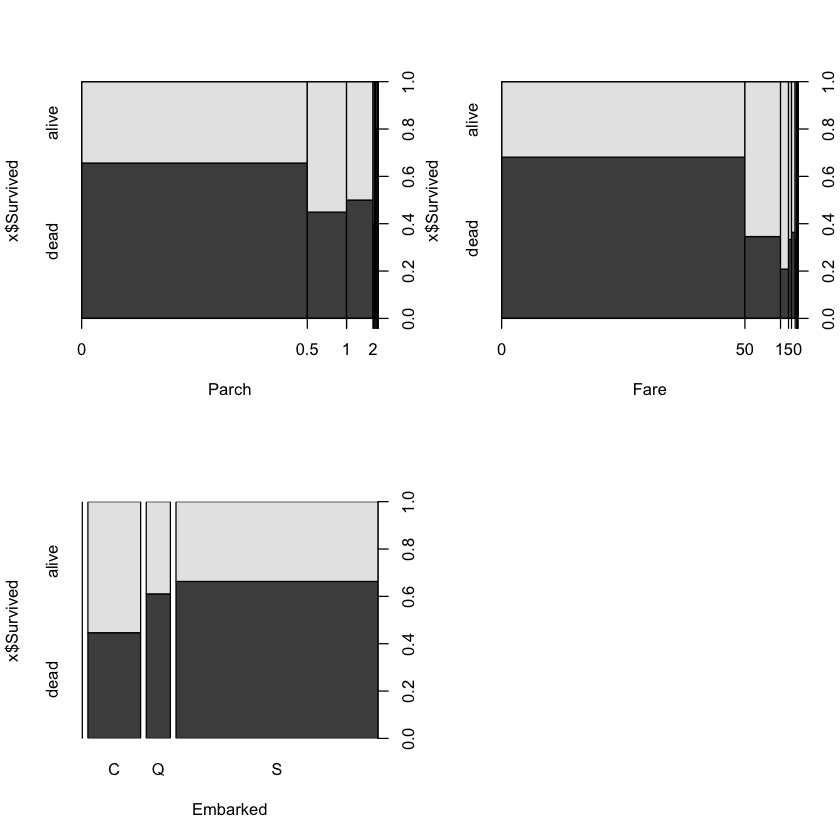

In [16]:
par.default <- par(mfrow = c(2, 2))
plot(x$Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked, data=x)
par(par.default)

### Remarques:
On peut confirmer une nouvelle fois, que la variable sexe a une grande importance dans l'analyse de Survived.

# B : Without variable Age

### Préparation données

In [17]:
X <- x[, -c(1, 4, 6, 9, 11, 12)]
summary(X)

test.ratio <- .2   # part de l'échantillon test
npop <- nrow(X) # nombre de lignes dans les données
nvar <- ncol(X) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

# construction de l'échantillon d'apprentissage
datappr <- X[appri,] 
# construction de l'échantillon test
datest <- X[testi,] 

  Survived       Pclass        Sex          SibSp           Parch       
 dead :549   class 1:216   female:314   Min.   :0.000   Min.   :0.0000  
 alive:342   class 2:184   male  :577   1st Qu.:0.000   1st Qu.:0.0000  
             class 3:491                Median :0.000   Median :0.0000  
                                        Mean   :0.523   Mean   :0.3816  
                                        3rd Qu.:1.000   3rd Qu.:0.0000  
                                        Max.   :8.000   Max.   :6.0000  
      Fare       
 Min.   :  0.00  
 1st Qu.:  7.91  
 Median : 14.45  
 Mean   : 32.20  
 3rd Qu.: 31.00  
 Max.   :512.33  

### Commentaires:

Nous avons choisi de conserver seulement une partie des variables explicatives pour une première étude. Certaines trop compliquées à exploiter (Nom, Cabin) ou tout simplement inutile (PassengerID, Embarked). 

Nous avons également supprimer la variable Age du fait de la proportion de données manquantes trop importante. Nous verrons dans la partie suivante comment résoudre ce problème.

Nous avons fait le choix de couper le data set en deux, la première partie dédiée à l'apprentissage (80% des données) , la deuxième partie sera dédiée au test de cet apprentissage (20% restant).

## Regression logistique sans Age

In [18]:
m0 = glm(Survived~ .^2,data=datappr,family = binomial(link = "logit"))
#XX <- X[,-c(1)]
#y <- X$Survived

#Xy <- as.data.frame(cbind(XX,y))
#m1 = bestglm(Xy, family = binomial(link = "logit"))
summary(m0)


Call:
glm(formula = Survived ~ .^2, family = binomial(link = "logit"), 
    data = datappr)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5757  -0.5297  -0.5011   0.4813   2.1852  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)   
(Intercept)            2.3898047  1.2135008   1.969  0.04891 * 
Pclassclass 2         -0.5428148  1.2550286  -0.433  0.66537   
Pclassclass 3         -2.2972488  1.1796484  -1.947  0.05149 . 
Sexmale               -3.5066274  1.1841997  -2.961  0.00306 **
SibSp                  1.4299212  0.7483757   1.911  0.05604 . 
Parch                 -0.0522088  0.6979430  -0.075  0.94037   
Fare                   0.0129215  0.0122143   1.058  0.29010   
Pclassclass 2:Sexmale -0.3330837  1.1989299  -0.278  0.78115   
Pclassclass 3:Sexmale  1.1626302  1.1560715   1.006  0.31457   
Pclassclass 2:SibSp   -1.0967593  0.8267205  -1.327  0.18463   
Pclassclass 3:SibSp   -1.7496045  0.7014805  -2.494  0.01263 * 
Pclassclas

In [19]:
best=stepAIC(m0,~.,trace=TRUE, direction=c("backward"))

Start:  AIC=643.88
Survived ~ (Pclass + Sex + SibSp + Parch + Fare)^2

               Df Deviance    AIC
- Sex:SibSp     1   601.88 641.88
- SibSp:Parch   1   601.93 641.93
- Sex:Fare      1   602.04 642.04
- SibSp:Fare    1   603.26 643.26
<none>              601.88 643.88
- Parch:Fare    1   604.19 644.19
- Pclass:Fare   2   606.36 644.36
- Pclass:Sex    2   608.04 646.04
- Pclass:SibSp  2   609.17 647.17
- Sex:Parch     1   609.57 649.57
- Pclass:Parch  2   612.89 650.89

Step:  AIC=641.88
Survived ~ Pclass + Sex + SibSp + Parch + Fare + Pclass:Sex + 
    Pclass:SibSp + Pclass:Parch + Pclass:Fare + Sex:Parch + Sex:Fare + 
    SibSp:Parch + SibSp:Fare + Parch:Fare

               Df Deviance    AIC
- SibSp:Parch   1   601.93 639.93
- Sex:Fare      1   602.06 640.06
- SibSp:Fare    1   603.30 641.30
<none>              601.88 641.88
- Parch:Fare    1   604.19 642.19
- Pclass:Fare   2   606.36 642.36
- Pclass:Sex    2   608.18 644.18
- Pclass:SibSp  2   609.17 645.17
- Sex:Parch     1 

In [20]:
summary(best)
summary(m0)


Call:
glm(formula = Survived ~ Pclass + Sex + SibSp + Parch + Fare + 
    Pclass:Sex + Pclass:SibSp + Pclass:Parch + Pclass:Fare + 
    Sex:Parch + Parch:Fare, family = binomial(link = "logit"), 
    data = datappr)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5732  -0.5295  -0.5023   0.4822   2.2138  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)            2.616751   0.781606   3.348 0.000814 ***
Pclassclass 2         -0.645067   0.986445  -0.654 0.513156    
Pclassclass 3         -2.460907   0.799754  -3.077 0.002090 ** 
Sexmale               -3.778878   0.714315  -5.290 1.22e-07 ***
SibSp                  0.713569   0.393122   1.815 0.069503 .  
Parch                  0.247155   0.661479   0.374 0.708673    
Fare                   0.011219   0.005364   2.091 0.036488 *  
Pclassclass 2:Sexmale -0.148119   0.901522  -0.164 0.869496    
Pclassclass 3:Sexmale  1.382260   0.741265   1.865 0.062219 .  
Pclassclass 2:


Call:
glm(formula = Survived ~ .^2, family = binomial(link = "logit"), 
    data = datappr)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5757  -0.5297  -0.5011   0.4813   2.1852  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)   
(Intercept)            2.3898047  1.2135008   1.969  0.04891 * 
Pclassclass 2         -0.5428148  1.2550286  -0.433  0.66537   
Pclassclass 3         -2.2972488  1.1796484  -1.947  0.05149 . 
Sexmale               -3.5066274  1.1841997  -2.961  0.00306 **
SibSp                  1.4299212  0.7483757   1.911  0.05604 . 
Parch                 -0.0522088  0.6979430  -0.075  0.94037   
Fare                   0.0129215  0.0122143   1.058  0.29010   
Pclassclass 2:Sexmale -0.3330837  1.1989299  -0.278  0.78115   
Pclassclass 3:Sexmale  1.1626302  1.1560715   1.006  0.31457   
Pclassclass 2:SibSp   -1.0967593  0.8267205  -1.327  0.18463   
Pclassclass 3:SibSp   -1.7496045  0.7014805  -2.494  0.01263 * 
Pclassclas

### Commentaires:

Nous avons crée deux modèles (m0 et best). Le premier est le modèle complet (tous les paramètres et leurs intéractions). 

Le modèle best est quant à lui obtenu grâce au critère AIC en backward à partir de m0. Les variables conservées par le critère AIC correspondent bien aux variables identifiées comme importantes dans la partie précédente (stats descriptives), l'âge, le sexe, la classe ..

Puisque best est sous modèle de m0 réalisons un test de sous-modèle:

In [21]:
anova(m0,best,test="Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,691,601.8763,NA,NA,NA
2,695,603.4377,-4,-1.561345,0.8157221


### Remarques:

On voit comme prévu qu'on accepte très largement best contre m0. 

In [22]:
p <- predict(best, newdata = datest, type = "response")
tab <- table(pred.reg = p > 0.5, observations = datest$Survived)
tab
sum(diag(tab)) / sum(tab)

        observations
pred.reg dead alive
   FALSE   86    11
   TRUE    26    56

[1] 0.7932961

### Remarques:

On a construit notre glm sur le set d'apprentissage (80% des données). La prédiction sur les autres données nous un taux de classification de environ 78%. 

REMARQUE : A des fins de reproductibilité, penser à fixer le germe aléatoire (utiliser set.seed) car le résultat varie selon l'ensemble test.


## Naive tree

Réalisons un arbre de classification pour la variable binaire Survived.

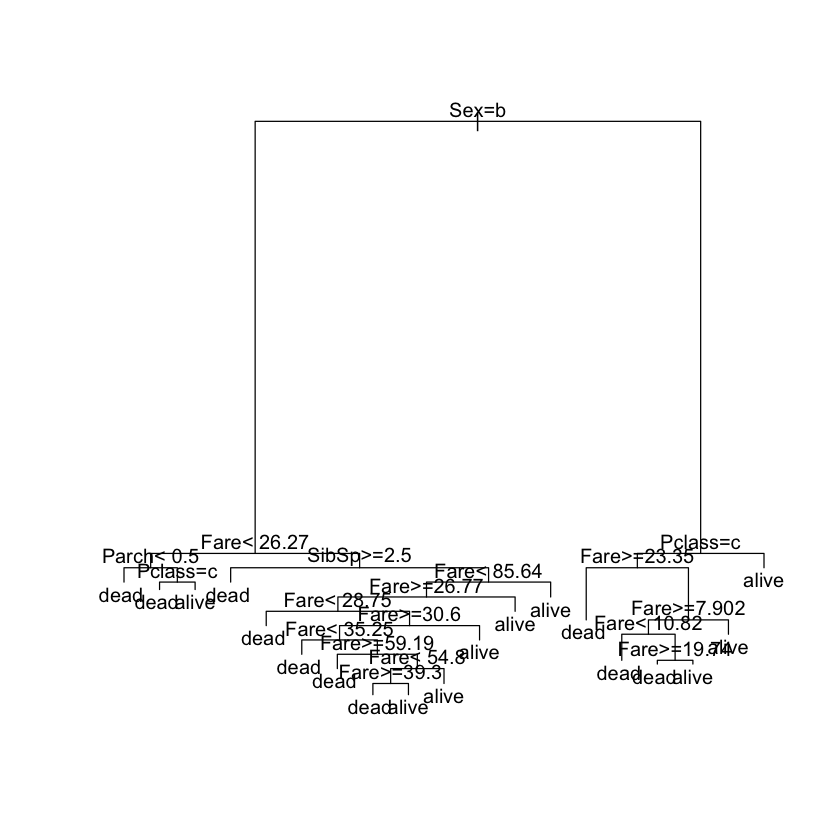

In [23]:
tree.c=rpart(Survived~.,data=datappr,control=rpart.control(cp=0.001))
# La commande ci-dessous fournit un descriptif de l'arbre obtenu

plot(tree.c)
text(tree.c)

xmat=xpred.rpart(tree.c, xval = 10)
#levels(datappr[,"Survived"]) <- c(1,2)
xerr <- (xmat-as.numeric(datappr[, "Survived"]))^2

### Remarques:

On observe que ce premier arbre naïf met en évidence l'importance de la variable Sexe. 

Essayons de trouver l'arbre optimal en calculant le CP optimal.

In [24]:
CVerr=apply(xerr,2,sum)
CVerr  #    CP           erreur

0.710909091 0.114184134 0.019834022 0.007855443 0.004198911 0.001906925 
        275         159         147         146         154         146

[1] 0.007855443

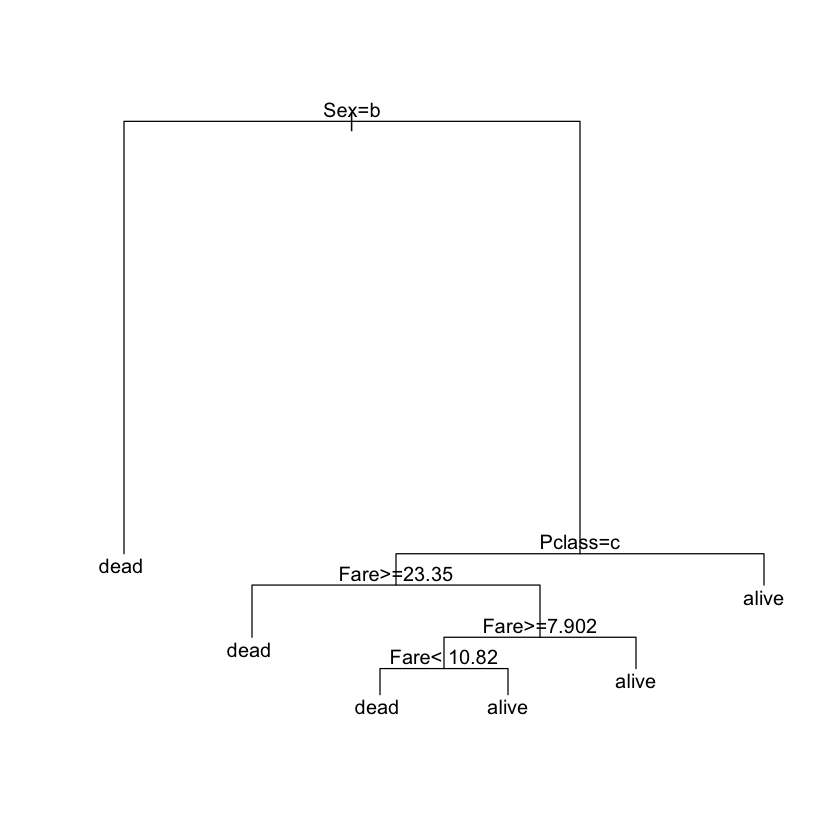

In [25]:
cp_opti = as.numeric(attributes(which.min(CVerr))$names); cp_opti

tree.c=rpart(Survived~.,data=datappr,control=rpart.control(cp=cp_opti))

plot(tree.c)
text(tree.c)

### Remarques:

L'arbre élagué a beaucoup moins de branches, néanmoins la classification est trop catégorique puisque tous les hommes meurent. La variable sexe est très importante: nous l'avions remarqué dans la partie A lors de l'analyse descriptive.

In [26]:
p_naive <- predict(tree.c, newdata = datest, type = "class")
tab2 = table(p_naive, datest[, "Survived"]); tab2
sum(diag(tab2)) / sum(tab2)

       
p_naive dead alive
  dead   102    16
  alive   10    51

[1] 0.8547486

### Remarques:

Bien que l'arbre de discrimination soit très simple, on obtient un taux de classification aux alentours de 80%.

## Random Forest

Poursuivons notre étude en créant une forêt aléatoire.

In [27]:
rf.c <- randomForest(Survived ~ ., data = datappr, 
                       xtest = datest[,-1], ytest = datest[,"Survived"],
                       ntree = 500,do.trace = 50, importance = TRUE)
pred.rf <- rf.c$test$predicted
tab3 = table(pred.rf, datest[, "Survived"]); 
sum(diag(tab3)) / sum(tab3)

ntree      OOB      1      2|    Test      1      2
   50:  20.51% 10.98% 35.64%|  22.91% 20.54% 26.87%
  100:  20.22% 10.76% 35.27%|  21.79% 19.64% 25.37%
  150:  20.37% 10.76% 35.64%|  20.67% 18.75% 23.88%
  200:  20.08% 11.21% 34.18%|  20.11% 17.86% 23.88%
  250:  20.51% 11.67% 34.55%|  21.23% 19.64% 23.88%
  300:  20.22% 11.44% 34.18%|  21.23% 19.64% 23.88%
  350:  20.37% 11.67% 34.18%|  21.23% 19.64% 23.88%
  400:  20.79% 12.36% 34.18%|  20.67% 18.75% 23.88%
  450:  20.51% 11.90% 34.18%|  20.67% 18.75% 23.88%
  500:  20.65% 12.36% 33.82%|  21.23% 19.64% 23.88%


[1] 0.7877095

In [28]:
# reglage du parametre mtry
library(caret)
mtryTrials <- train(Survived ~ ., data = datappr, method = "rf")
print(mtryTrials)

ERROR: Error: package or namespace load failed for ‘caret’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called ‘lubridate’


In [ ]:
#cvControl <- trainControl(method = "cv", number = 10)
#mtryTrials <- train(datappr[, c("SibSp", "Parch", "Fare")], data =datappr, method = "rf", tuneLength = ncol(train),
               trControl = cvControl, trace = FALSE)
#mtryTrials

In [29]:

#mtry= 4
print("mtry =4")
rf.c1 <- randomForest(Survived ~ ., data = datappr, 
                       xtest = datest[,-1], ytest = datest[,"Survived"],
                       ntree = 500,mtry=4,do.trace = 50, importance = TRUE)
pred.rf1 <- rf.c1$test$predicted
tab31 = table(pred.rf1, datest[, "Survived"]); 
sum(diag(tab31)) / sum(tab31)


#mtry= 3
print("mtry=3")
rf.c1 <- randomForest(Survived ~ ., data = datappr, 
                       xtest = datest[,-1], ytest = datest[,"Survived"],
                       ntree = 500,mtry=3,do.trace = 50, importance = TRUE)
pred.rf1 <- rf.c1$test$predicted
tab31 = table(pred.rf1, datest[, "Survived"]); 
sum(diag(tab31)) / sum(tab31)


#mtry= 2
print("mtry = 2")
rf.c1 <- randomForest(Survived ~ ., data = datappr, 
                       xtest = datest[,-1], ytest = datest[,"Survived"],
                       ntree = 500,mtry=2,do.trace = 50, importance = TRUE)
pred.rf1 <- rf.c1$test$predicted
tab31 = table(pred.rf1, datest[, "Survived"]); 
sum(diag(tab31)) / sum(tab31)

[1] "mtry =4"
ntree      OOB      1      2|    Test      1      2
   50:  20.08% 13.04% 31.27%|  13.97% 11.61% 17.91%
  100:  19.94% 13.50% 30.18%|  15.64% 13.39% 19.40%
  150:  20.08% 13.96% 29.82%|  15.64% 13.39% 19.40%
  200:  20.51% 14.19% 30.55%|  15.64% 13.39% 19.40%
  250:  20.22% 13.73% 30.55%|  16.20% 14.29% 19.40%
  300:  20.22% 13.96% 30.18%|  16.20% 14.29% 19.40%
  350:  20.08% 13.73% 30.18%|  16.20% 14.29% 19.40%
  400:  19.80% 13.50% 29.82%|  16.20% 14.29% 19.40%
  450:  19.94% 13.27% 30.55%|  16.20% 14.29% 19.40%
  500:  19.80% 13.27% 30.18%|  16.20% 14.29% 19.40%


[1] 0.8379888

[1] "mtry=3"
ntree      OOB      1      2|    Test      1      2
   50:  20.79% 11.90% 34.91%|  16.20% 16.07% 16.42%
  100:  20.65% 11.67% 34.91%|  16.76% 15.18% 19.40%
  150:  20.65% 12.36% 33.82%|  16.76% 15.18% 19.40%
  200:  20.51% 12.59% 33.09%|  17.32% 16.07% 19.40%
  250:  20.65% 12.81% 33.09%|  16.76% 15.18% 19.40%
  300:  20.65% 12.81% 33.09%|  16.76% 15.18% 19.40%
  350:  20.65% 12.81% 33.09%|  16.76% 15.18% 19.40%
  400:  20.51% 13.04% 32.36%|  16.20% 15.18% 17.91%
  450:  20.51% 13.04% 32.36%|  16.76% 15.18% 19.40%
  500:  20.51% 13.04% 32.36%|  16.20% 15.18% 17.91%


[1] 0.8379888

[1] "mtry = 2"
ntree      OOB      1      2|    Test      1      2
   50:  20.79% 12.36% 34.18%|  20.67% 18.75% 23.88%
  100:  20.51% 12.13% 33.82%|  21.79% 18.75% 26.87%
  150:  20.93% 12.36% 34.55%|  22.35% 19.64% 26.87%
  200:  21.35% 12.13% 36.00%|  22.35% 19.64% 26.87%
  250:  21.07% 11.44% 36.36%|  22.35% 19.64% 26.87%
  300:  20.65% 10.98% 36.00%|  21.79% 19.64% 25.37%
  350:  20.65% 11.44% 35.27%|  21.79% 19.64% 25.37%
  400:  20.51% 11.21% 35.27%|  22.35% 19.64% 26.87%
  450:  20.79% 11.67% 35.27%|  20.67% 18.75% 23.88%
  500:  20.37% 10.98% 35.27%|  20.67% 18.75% 23.88%


[1] 0.7932961

### Remarques:

On obtient avec l'utilisation de forêt aléatoire un taux de classification plus important aux alentours de 85%.

Le meilleur paramètre mtry vaut 3. Pas étonnant, la valeur par défaut de ce paramètre est sqrt(p) en classification soit environ 3,16. On peut considérer 3 comme valeur optimale. 

## Comparaison des modèles par les courbes ROC sans la variable Age

Comparons nos modèles avec des courbes ROC.

Loading required package: gplots


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




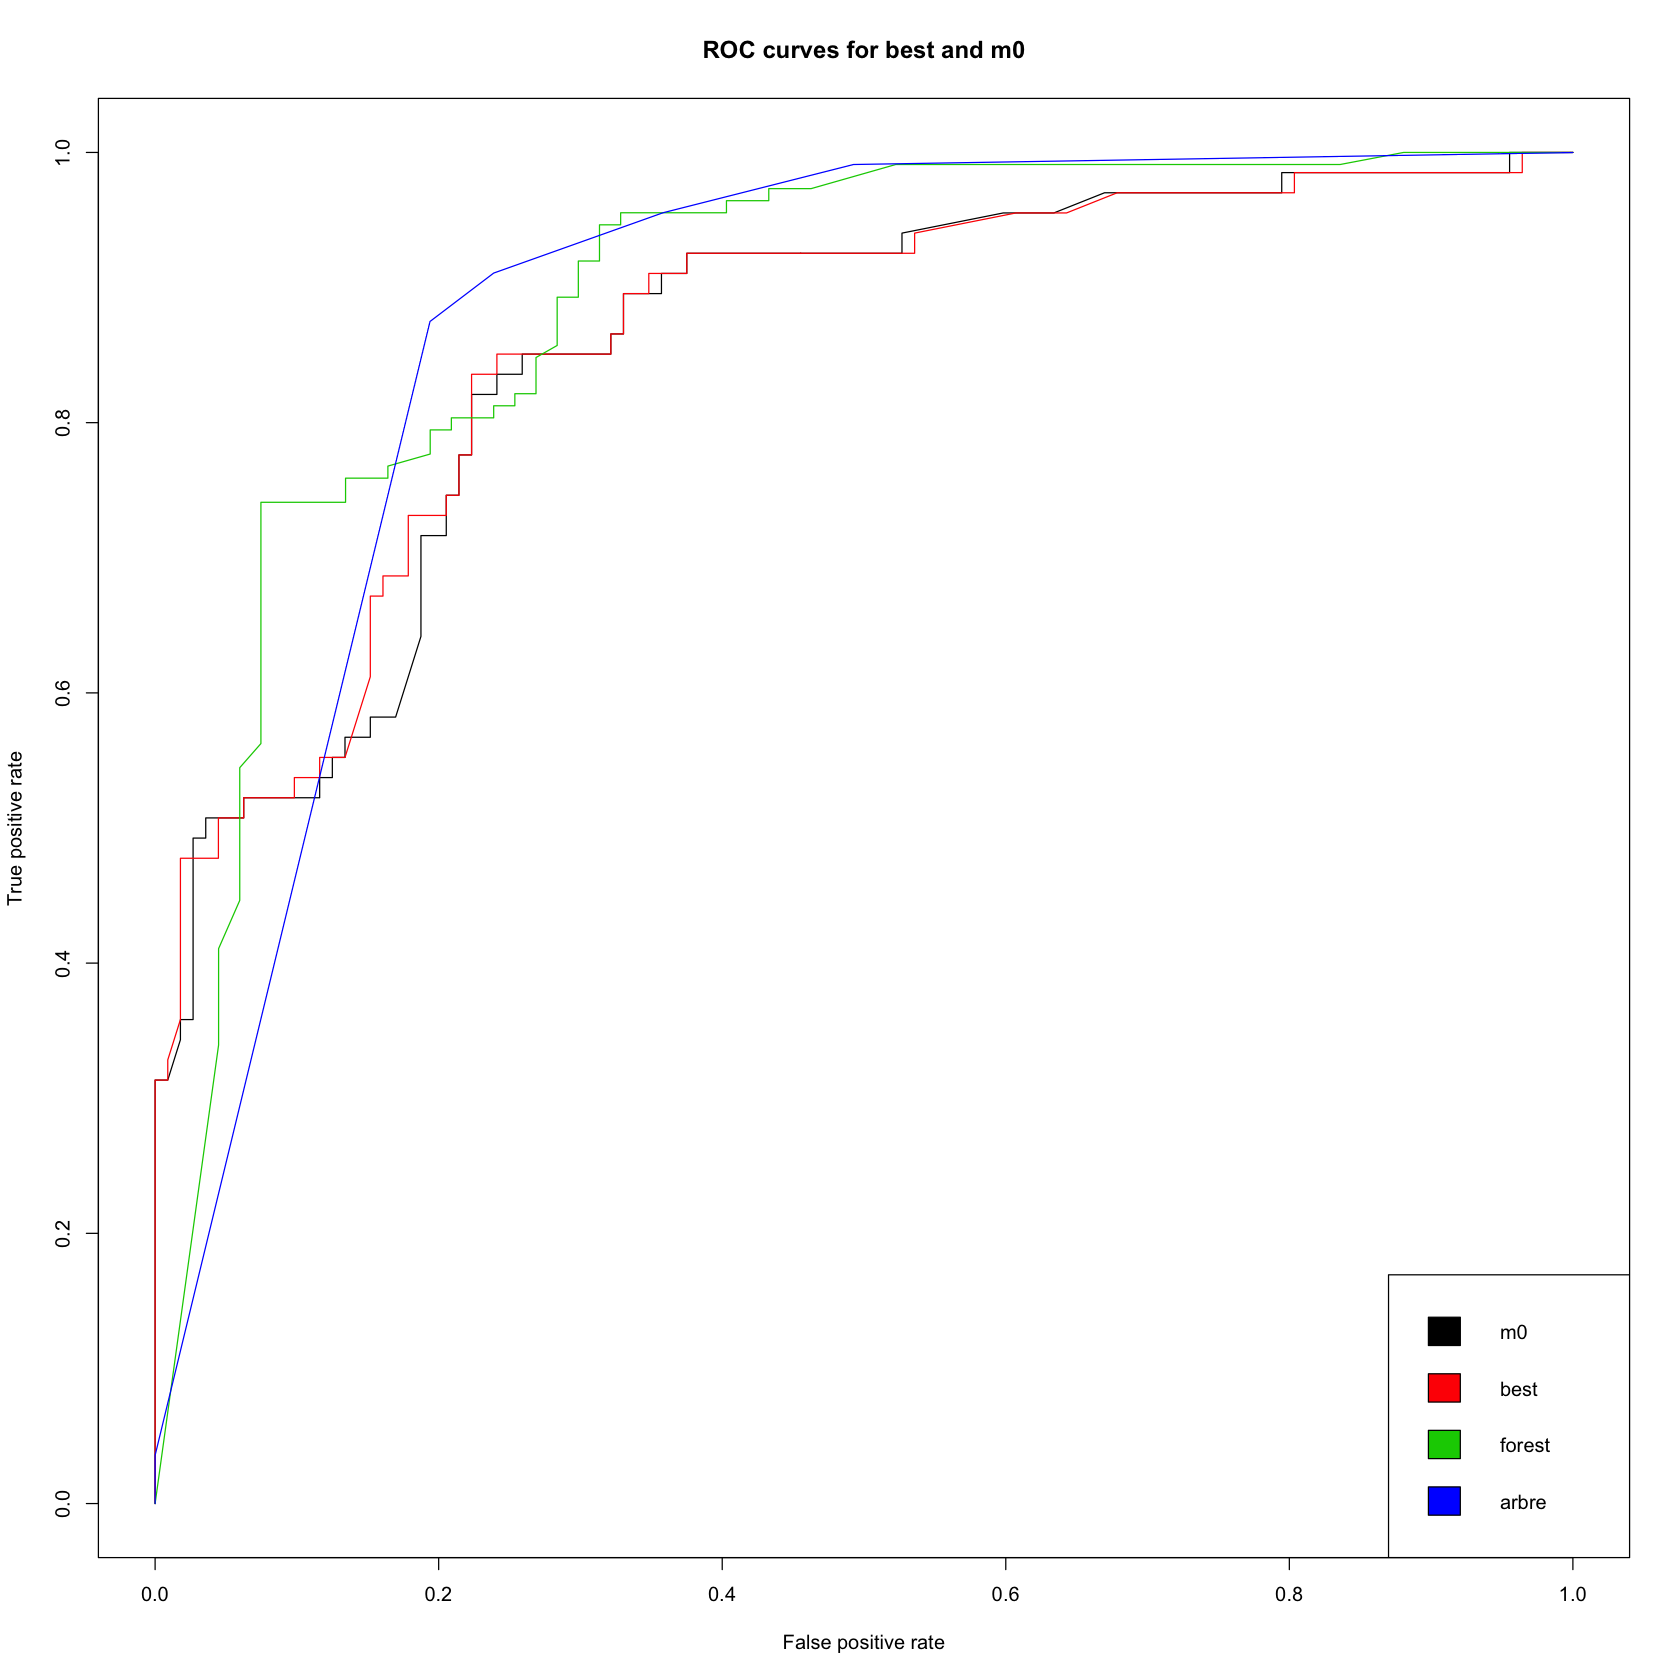

In [30]:
library(ROCR)



roclogitb<-predict(best,newdata=datest,type="response")
predlogitb=prediction(roclogitb,as.numeric(datest[,"Survived"])-1)
perflogitb=performance(predlogitb, "tpr","fpr")

roclogit0=predict(m0,newdata=datest,type="response")

predlogit0=prediction(roclogit0,as.numeric(datest[,"Survived"])-1)
perflogit0=performance(predlogit0, "tpr","fpr")

# Tracé de la courbe
options(repr.plot.width=14, repr.plot.height=14)

# Arbre de décision
ptree <- predict(tree.c, newdata = datest, type = "prob")  
pROCtree <- prediction(ptree[, 1], datest$Survived)
perftree <- performance(pROCtree, "tpr", "fpr")

# Foret
pforest <- rf.c$test$votes
pROCforest <- prediction(pforest[, 1], datest$Survived)
perfforest <- performance(pROCforest, "tpr", "fpr")


plot(perflogit0,main="ROC curves for best and m0",col=1)
plot(perflogitb,col=2,add=TRUE)
plot(perfforest,col=3,add=TRUE)
plot(perftree,col=4,add=TRUE)
lbs= c("m0", "best","forest","arbre")
legend(x="bottomright", legend= lbs, cex=1, fill=c(1,2,3,4))

### Remarques:

On observe deux courbes ROC quasi identiques, c'est normal best est sous modèle de m0. L'arbre de décision a une courbe ROC meilleur que les deux modèles m0 et best si on tolère un grand taux de faux positifs.

La courbe ROC de la forêt est meilleure que toutes les autres à partir d'environ 10% de false positive rate.

Crééons une fonction ROCpoint pour obtenir le seuil qui donne le meilleur true positive rate avec un false positive rate donné.
Pour deux modèles, on peut donc choisir un modèle plutot qu'un autre selon la perspective adoptée (false positive/true positive).


In [31]:
Y = as.numeric(X[testi, "Survived"])-1;
roclogitb=predict(best,newdata=datest,type="response")
predm0=predict(m0,newdata=datest,type="response")
#ROC point permet d'obtenir le seuil qui donne le meilleur true positive rate avec un false positive rate donné.
#Pour deux modèle. On peut donc choisir un modèle plutot qu'un autre selon nos critères.
ROC_point <- function (tol_FP,FP1,TP1,FP2,TP2){
    pas = 1/(length(FP)-1)
    pos1= min(which(FP1<=tol_FP)) #on recherche l'indice dans le vecteur des FP
    ord1= TP1[pos1]
    points(FP1[pos1],ord1,pch = 9)
    pos2= min(which(FP2<=tol_FP)) #on recherche l'indice dans le vecteur des FP
    ord2= TP2[pos2]
    points(FP2[pos2],ord2,pch = 9) 
    s1 = pos1*pas
    cat("Seuil 1 :" ,s1, "\n")
    s2=pos2*0.001
    cat("Seuil 2 :",s2)
}

In [ ]:
#ROC_curve <- function(nb_points,vec_pred,Y){
#    n = length(vec_pred[])
#    print(n)
#    pas = 1/(nb_points-1)
#    FP <- matrix(nrow=n, ncol=nb_points)
#    TP <- matrix(nrow=n, ncol=nb_points)
#    
#    k=1
#    for (s in seq(0,1,by=pas)){
#        for (i in 1:n){
#            #print(vec_pred[i])
#            ps = (vec_pred[i]>s)
#            FP[i,k]= sum((ps==1)*(Y==0)/sum(Y==0)
#            TP[i,k]= sum((ps==1)*(Y==1))/)sum(Y==0)
#        }
#    k = k + 1
#    }
#    #print(FP)
#    #print(TP)
#    R <- c('FP'=FP,'TP'=TP)
#    return (R)
#}
#         
#R = ROC_curve(1001,c(roclogitb,predm0),Y)
#FP = R['FP']
#TP = R['TP']

In [32]:
FP=TP=rep(NA,1001)
FP2=TP2=rep(NA,1001)
for(s in seq(0,1,by=.001)){
    Ps1=(roclogitb>s)*1
    Ps2=(predm0>s)*1
    FP[1+s*1000]=sum((Ps1==1)*(Y==0))/sum(Y==0)
    TP[1+s*1000]=sum((Ps1==1)*(Y==1))/sum(Y==1)
    FP2[1+s*1000]=sum((Ps2==1)*(Y==0))/sum(Y==0)
    TP2[1+s*1000]=sum((Ps2==1)*(Y==1))/sum(Y==1)
}

Seuil 1 : 0.186 
Seuil 2 : 0.196

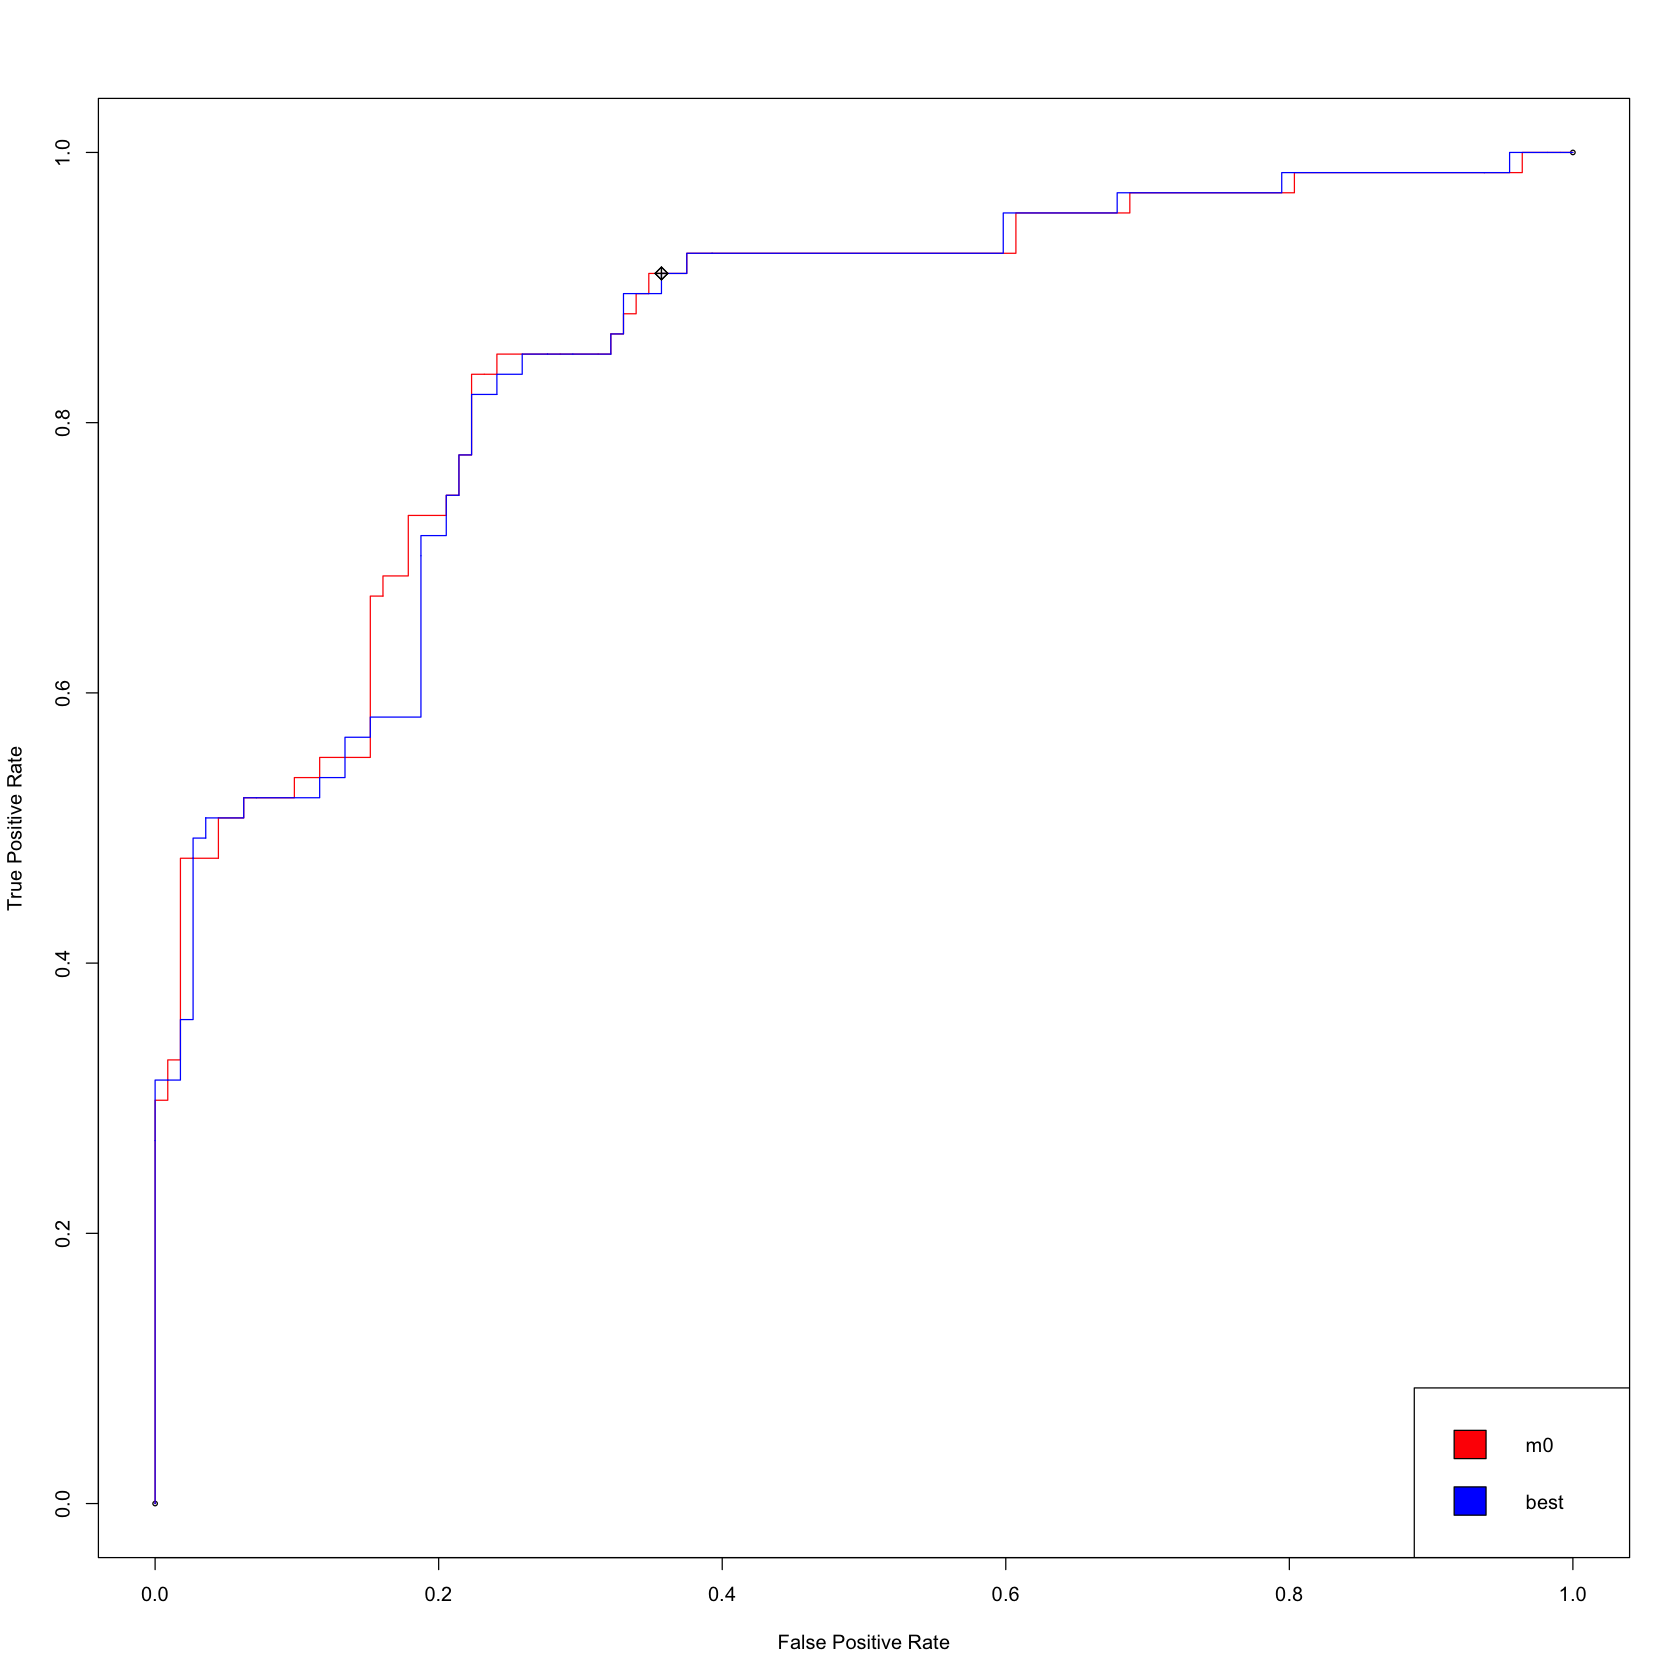

In [33]:
plot(0:1,0:1,xlab="False Positive Rate", ylab="True Positive Rate",cex=.5)

lines(c(FP),c(TP),type="S",col="red")
lines(c(FP2),c(TP2),type="S",col="blue")
test1=ROC_point(0.36, FP,TP,FP2,TP2)
lbs= c("m0", "best")
legend(x="bottomright", legend= lbs, cex=1, fill=c("red","blue"))

### Commentaires:

On a créé cette fonction pour faire apparaître un seuil donné sur les coubres ROC. Par exemple ici nous nous fixons un False Positive Rate maximum de 0.6. L'algorithme nous donne alors les meilleurs seuils correspondant à cette contrainte (False positive rate <= 0.6, True positive rate maximum)


<font color='green'>
    
    
QUESTION : Idée intéressante, et bonne prise d'initiative ! Cependant, pourquoi n'obtenez vous pas les mêmes courbes ROC que ci-dessus, avec le package ROCR? Vérifier votre code ou expliquer.
</font>

Nous n'obtenons pas la même courbe car nous avons calculé les "true positive rate" et "false positive rate" avec des des valeurs de seuils discrétisées de façon uniforme entre 0 et 1. Contrairement à la fonction "performance" qui calcule ces taux avec des seuils particuliers (surement plus judicieux). C'est pour celà que nos courbes sont quasiment similaires à l'exeption de quelques variations négligeables.

# C : With variable age

## Données manquantes Age 

In [34]:
#variable cible
Y <- x[, "Survived"]
# Variables explicatives
Xna <- x[, -c(1,4,9,11,12)]
summary(Y); summary(Xna)

dead alive 
  549   342

  Survived       Pclass        Sex           Age            SibSp      
 dead :549   class 1:216   female:314   Min.   : 0.42   Min.   :0.000  
 alive:342   class 2:184   male  :577   1st Qu.:20.12   1st Qu.:0.000  
             class 3:491                Median :28.00   Median :0.000  
                                        Mean   :29.70   Mean   :0.523  
                                        3rd Qu.:38.00   3rd Qu.:1.000  
                                        Max.   :80.00   Max.   :8.000  
                                        NA's   :177                    
     Parch             Fare       
 Min.   :0.0000   Min.   :  0.00  
 1st Qu.:0.0000   1st Qu.:  7.91  
 Median :0.0000   Median : 14.45  
 Mean   :0.3816   Mean   : 32.20  
 3rd Qu.:0.0000   3rd Qu.: 31.00  
 Max.   :6.0000   Max.   :512.33  
                                  

In [35]:
library(missForest)
XnaImp <- missForest(Xna)

  missForest iteration 1 in progress...done!
  missForest iteration 2 in progress...done!
  missForest iteration 3 in progress...done!
  missForest iteration 4 in progress...done!


In [36]:
summary(XnaImp$ximp)
XnaImp$OOBerror

  Survived       Pclass        Sex           Age            SibSp      
 dead :549   class 1:216   female:314   Min.   : 0.42   Min.   :0.000  
 alive:342   class 2:184   male  :577   1st Qu.:22.00   1st Qu.:0.000  
             class 3:491                Median :28.87   Median :0.000  
                                        Mean   :29.64   Mean   :0.523  
                                        3rd Qu.:36.00   3rd Qu.:1.000  
                                        Max.   :80.00   Max.   :8.000  
     Parch             Fare       
 Min.   :0.0000   Min.   :  0.00  
 1st Qu.:0.0000   1st Qu.:  7.91  
 Median :0.0000   Median : 14.45  
 Mean   :0.3816   Mean   : 32.20  
 3rd Qu.:0.0000   3rd Qu.: 31.00  
 Max.   :6.0000   Max.   :512.33  

NRMSE       PFC 
0.1960408 0.0000000

### Commentaires:

On complète nos données manquantes sur la variable Age grâce à missForest. (Plus de NA dans le summary)

## Same models as before

In [37]:
X2 <- XnaImp$ximp
summary(X2)

test.ratio <- .2   # part de l'échantillon test
npop <- nrow(X2) # nombre de lignes dans les données
nvar <- ncol(X2) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

# construction de l'échantillon d'apprentissage
datappr2 <- X2[appri,] 
# construction de l'échantillon test
datest2 <- X2[testi,] 

  Survived       Pclass        Sex           Age            SibSp      
 dead :549   class 1:216   female:314   Min.   : 0.42   Min.   :0.000  
 alive:342   class 2:184   male  :577   1st Qu.:22.00   1st Qu.:0.000  
             class 3:491                Median :28.87   Median :0.000  
                                        Mean   :29.64   Mean   :0.523  
                                        3rd Qu.:36.00   3rd Qu.:1.000  
                                        Max.   :80.00   Max.   :8.000  
     Parch             Fare       
 Min.   :0.0000   Min.   :  0.00  
 1st Qu.:0.0000   1st Qu.:  7.91  
 Median :0.0000   Median : 14.45  
 Mean   :0.3816   Mean   : 32.20  
 3rd Qu.:0.0000   3rd Qu.: 31.00  
 Max.   :6.0000   Max.   :512.33  

### Commentaires:

On réitère le processus de préparation des données suite à l'intégration de la variable Age complétée.

On conserve le même ratio apprentissage/test. 

### GLM 

In [38]:
m02 = glm(Survived~ .^2,data=datappr2,family = binomial(link = "logit"))
best2=stepAIC(m02,~.,trace=TRUE, direction=c("backward"))
anova(m02,best2,test="Chisq")
p <- predict(best2, newdata = datest2, type = "response")
tab <- table(pred.reg = p > 0.5, observations = datest2$Survived)
tab
sum(diag(tab)) / sum(tab)

Start:  AIC=623.95
Survived ~ (Pclass + Sex + Age + SibSp + Parch + Fare)^2

               Df Deviance    AIC
- Pclass:Age    2   568.36 620.36
- Pclass:Parch  2   569.83 621.83
- SibSp:Fare    1   567.95 621.95
- SibSp:Parch   1   568.05 622.05
- Sex:SibSp     1   568.22 622.22
- Pclass:SibSp  2   570.58 622.58
- Age:SibSp     1   568.65 622.65
- Sex:Fare      1   569.71 623.71
- Age:Fare      1   569.73 623.73
- Parch:Fare    1   569.93 623.93
<none>              567.95 623.95
- Sex:Age       1   570.26 624.26
- Age:Parch     1   572.58 626.58
- Sex:Parch     1   572.66 626.66
- Pclass:Sex    2   576.93 628.93
- Pclass:Fare   2   577.12 629.12

Step:  AIC=620.36
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Pclass:Sex + 
    Pclass:SibSp + Pclass:Parch + Pclass:Fare + Sex:Age + Sex:SibSp + 
    Sex:Parch + Sex:Fare + Age:SibSp + Age:Parch + Age:Fare + 
    SibSp:Parch + SibSp:Fare + Parch:Fare

               Df Deviance    AIC
- SibSp:Fare    1   568.36 618.36
- SibSp:Parc

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,684,567.9524,NA,NA,NA
2,694,576.7500,-10,-8.797576,0.5514162


        observations
pred.reg dead alive
   FALSE   98    21
   TRUE    14    46

[1] 0.8044693

### Remarques:

Comme précédemment nous prenons le modèle complet m02 (m0 avec la variable âge) auquel nous appliquons un stepAIC pour obtenir le modèle best2. On remarque avec un test anova qu'on accepte très largement best2 contre m02.

On observe un taux de classification aux alentours de 80% pour le modèle best2.

On a une forte variation du taux de classification d'une compilation à une autre.





### GLM  sans intéraction

In [39]:
m1 = glm(Survived~ .,data=datappr2,family = binomial(link = "logit"))
best3=stepAIC(m1,~.,trace=TRUE, direction=c("backward"))
anova(m1,best3,test="Chisq")
p <- predict(best3, newdata = datest2, type = "response")
tab <- table(pred.reg = p > 0.5, observations = datest2$Survived)
tab
sum(diag(tab)) / sum(tab)

Start:  AIC=654.08
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare

         Df Deviance    AIC
- Fare    1   638.64 652.64
- Parch   1   639.50 653.50
<none>        638.08 654.08
- SibSp   1   648.67 662.67
- Age     1   667.40 681.40
- Pclass  2   691.07 703.07
- Sex     1   813.95 827.95

Step:  AIC=652.64
Survived ~ Pclass + Sex + Age + SibSp + Parch

         Df Deviance    AIC
- Parch   1   639.77 651.77
<none>        638.64 652.64
- SibSp   1   648.83 660.83
- Age     1   669.26 681.26
- Pclass  2   727.35 737.35
- Sex     1   816.57 828.57

Step:  AIC=651.77
Survived ~ Pclass + Sex + Age + SibSp

         Df Deviance    AIC
<none>        639.77 651.77
- SibSp   1   654.70 664.70
- Age     1   669.65 679.65
- Pclass  2   727.81 735.81
- Sex     1   819.20 829.20


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,704,638.0777,NA,NA,NA
2,706,639.7734,-2,-1.6957,0.4283348


        observations
pred.reg dead alive
   FALSE   97    18
   TRUE    15    49

[1] 0.8156425

### Remarques:

On crée le modèle best3, modèle résultant du stepAIC du modèle additif. On va réaliser notre prédiction sur ce modèle.

On obtient un taux de classification moins bon, pas étonnant nous ne prenons pas en compte les intéractions.

### Arbre de discrimination

0.720000000 0.120000000 0.030855569 0.017814471 0.009447550 0.007713892 
        275         154         147         128         131         134 
0.005938157 0.004198911 0.002571297 0.001348400 
        129         130         129         127

[1] 0.0013484

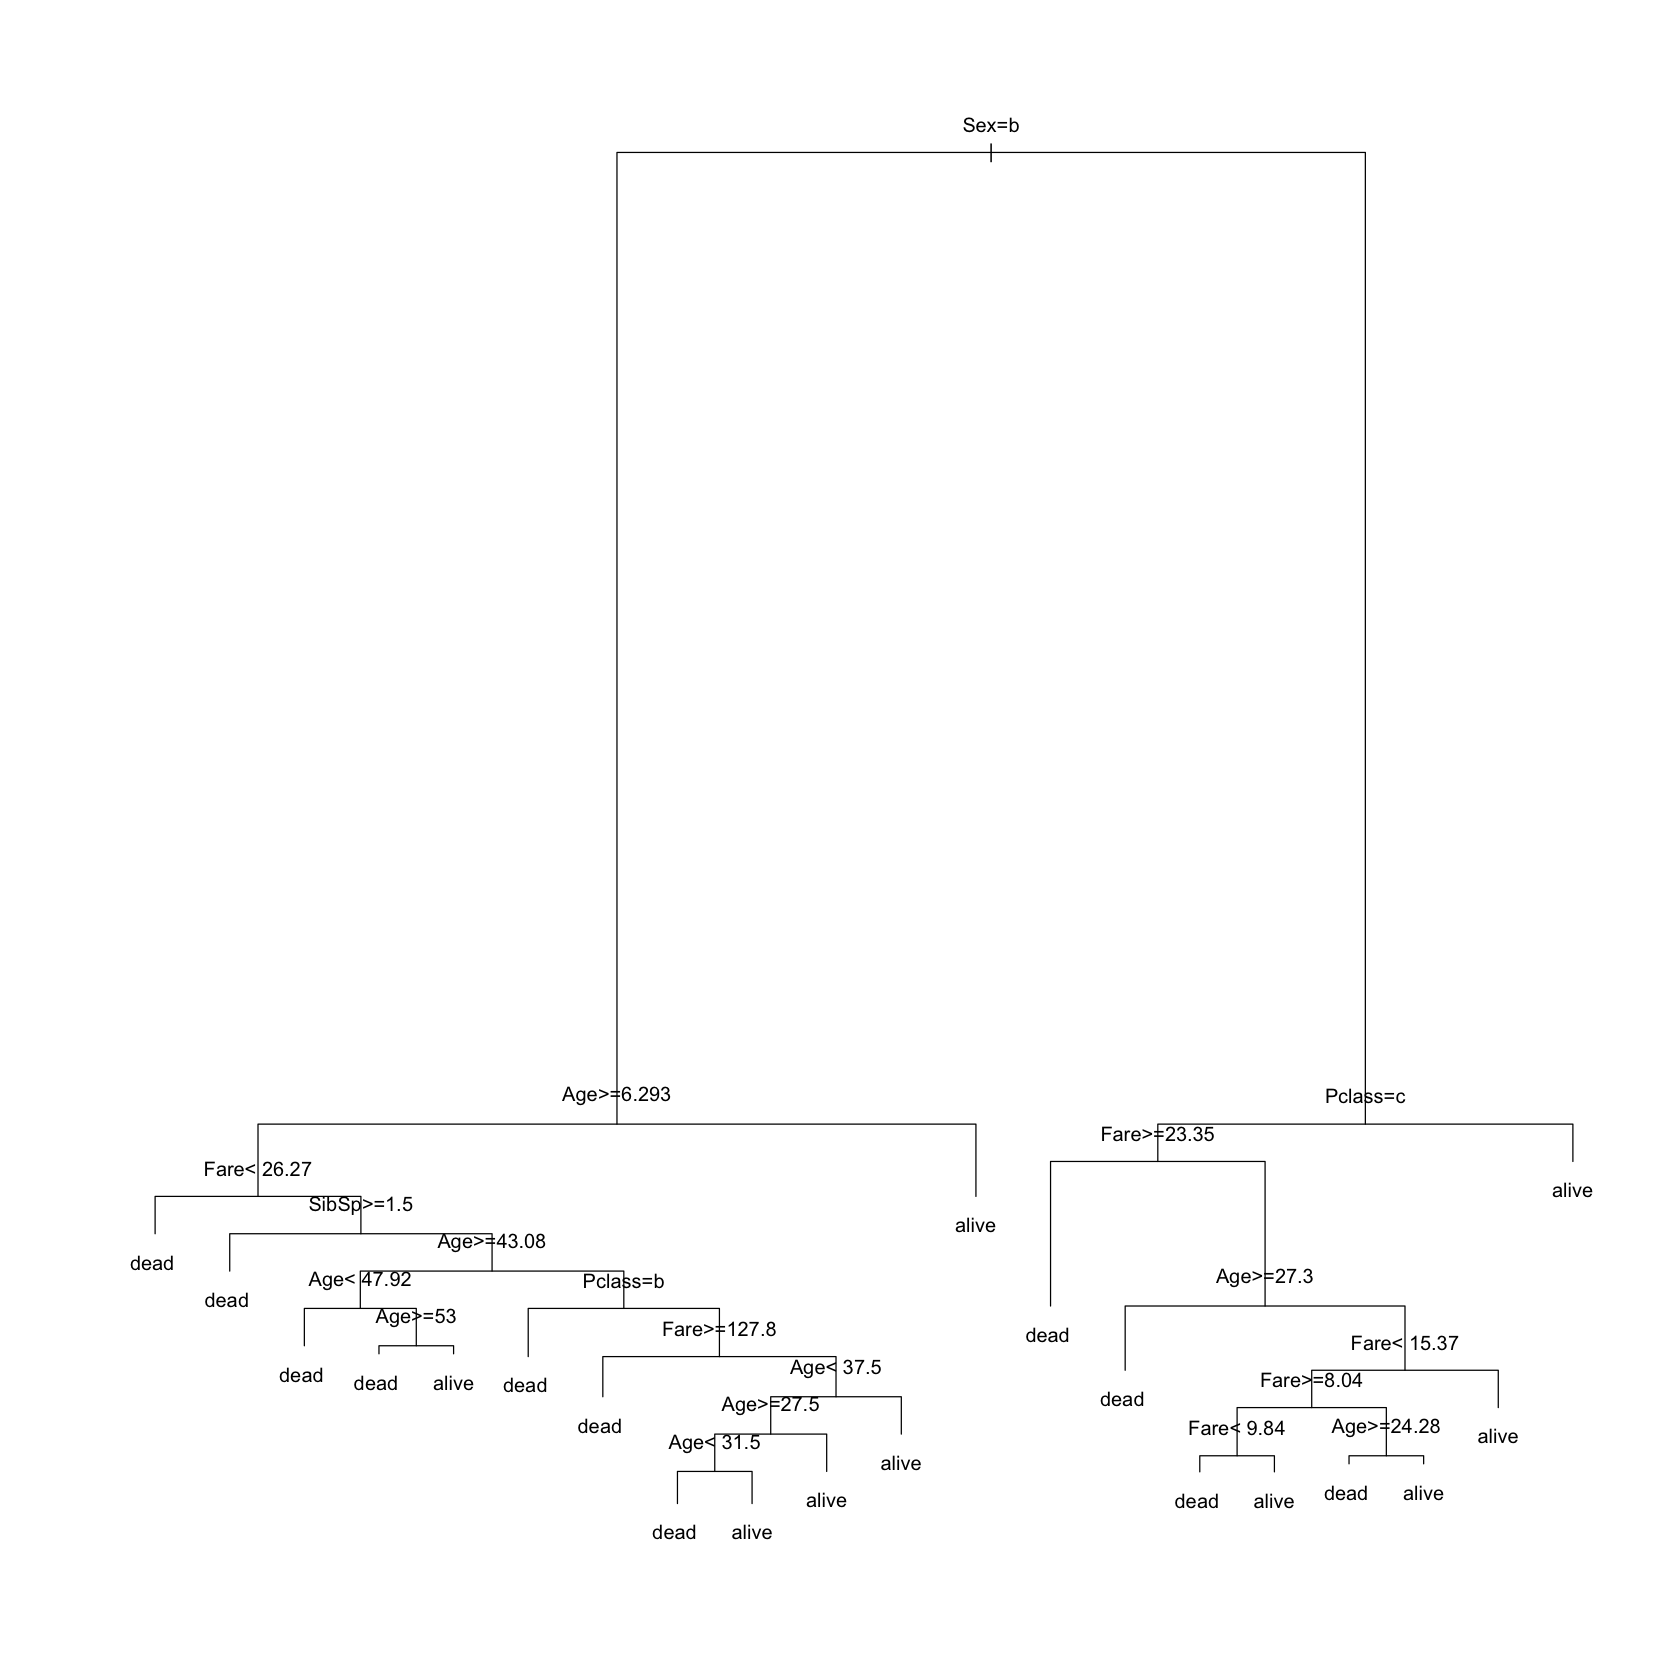

       
p       dead alive
  dead    91    15
  alive   21    52

[1] 0.7988827

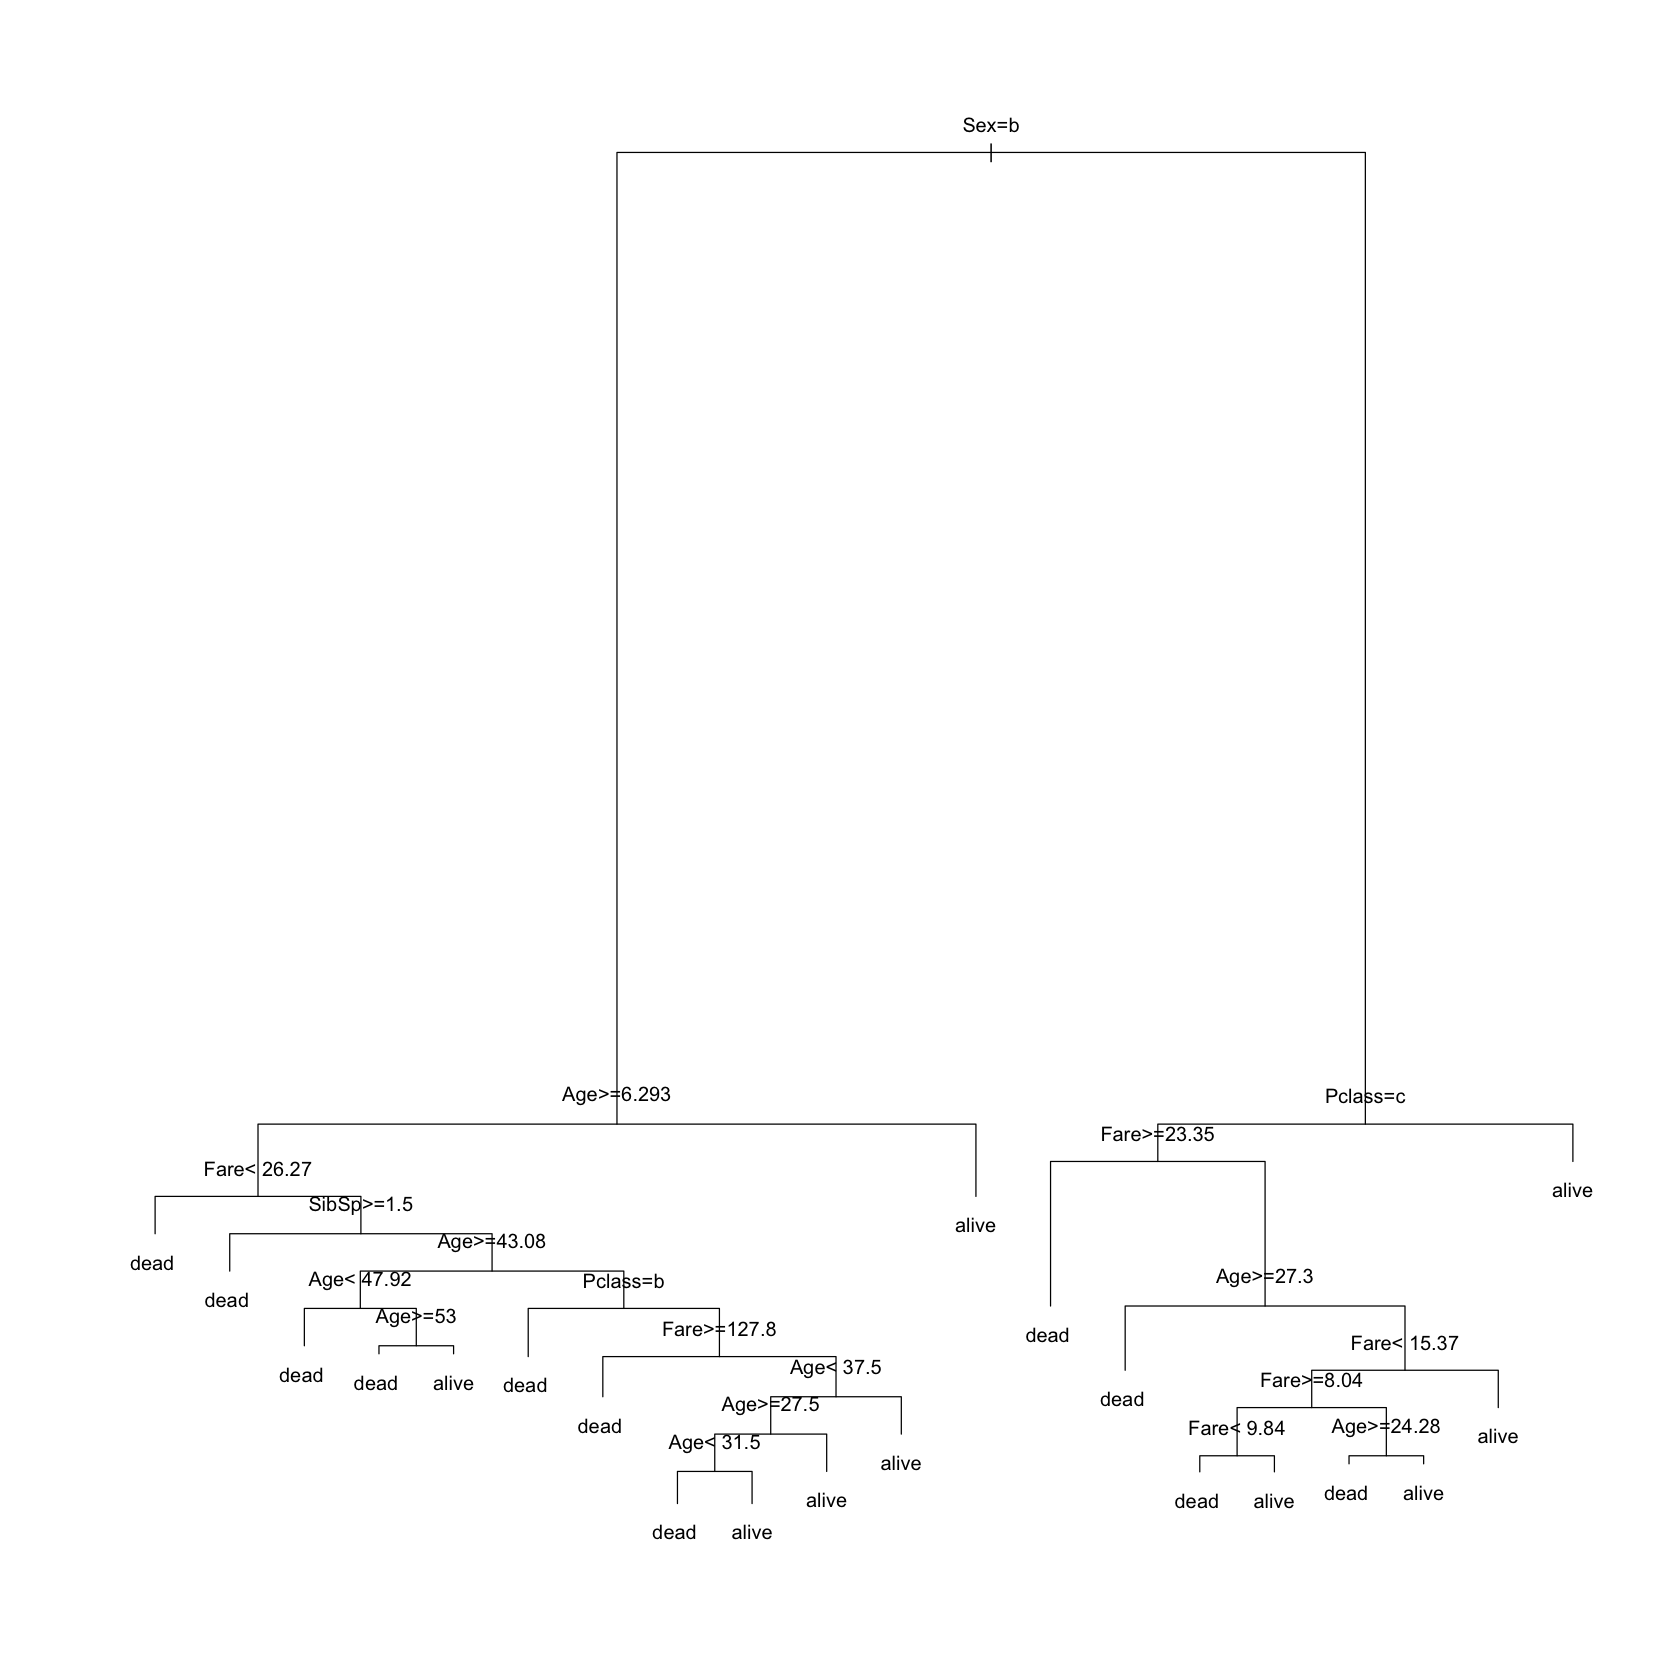

In [40]:
tree.c2 <-rpart(Survived~.,data=datappr2,control=rpart.control(cp=0.001))
# La commande ci-dessous fournit un descriptif de l'arbre obtenu

plot(tree.c2)
text(tree.c2)

xmat=xpred.rpart(tree.c2, xval = 10)
xerr <- (xmat-as.numeric(datappr2[, "Survived"]))^2
CVerr=apply(xerr,2,sum)
CVerr  #    CP           erreur
cp_opti = as.numeric(attributes(which.min(CVerr))$names); cp_opti

tree.c2=rpart(Survived~.,data=datappr2,control=rpart.control(cp=cp_opti))

plot(tree.c2)
text(tree.c2)

p <- predict(tree.c2, newdata = datest2, type = "class")
tab2 = table(p, datest2[, "Survived"]); tab2
sum(diag(tab2)) / sum(tab2)

### Remarques:

On observe que l'arbre classification élagué, cette fois ci en tenant compte de la variable Age, possède davantage de branches et ramifications.

Une nouvelle fois la variable Sexe crée la première branche (la plus importante), ce qui correspond bien à ce que nous avons vu lors de l'analyse des données en statistiques descriptives (partie A).


La complétion de la variable Age permet d'avoir un taux de classification plus important lors de notre prédiction. 

### Random forest

In [43]:
rf.c2 <- randomForest(Survived ~ ., data = datappr2, 
                       xtest = datest2[,-1], ytest = datest2[,"Survived"],
                       ntree = 500, mtry = 2, do.trace = 50, importance = TRUE)
pred.rf2 <- rf.c2$test$predicted
tab3 = table(pred.rf2, datest2[, "Survived"]); tab3
sum(diag(tab3)) / sum(tab3)

ntree      OOB      1      2|    Test      1      2
   50:  17.98% 11.67% 28.00%|  16.20% 12.50% 22.39%
  100:  16.99% 10.07% 28.00%|  15.08%  9.82% 23.88%
  150:  16.85%  9.61% 28.36%|  15.64% 10.71% 23.88%
  200:  16.85%  9.84% 28.00%|  15.64% 11.61% 22.39%
  250:  16.85%  9.84% 28.00%|  15.64% 11.61% 22.39%
  300:  16.43% 10.07% 26.55%|  15.08% 11.61% 20.90%
  350:  16.57%  9.84% 27.27%|  15.08% 11.61% 20.90%
  400:  16.43%  9.38% 27.64%|  15.08% 11.61% 20.90%
  450:  16.43%  9.15% 28.00%|  15.08% 11.61% 20.90%
  500:  16.85%  9.38% 28.73%|  15.64% 11.61% 22.39%


        
pred.rf2 dead alive
   dead    99    15
   alive   13    52

[1] 0.8435754

In [ ]:

#mtryTrials2 <- train(Survived ~ ., data = datappr2, method = "rf")
#print(mtryTrials2)

In [42]:
rf.c22 <- randomForest(Survived ~ ., data = datappr2, 
                       xtest = datest2[,-1], ytest = datest2[,"Survived"],
                       ntree = 500, do.trace = 50, importance = TRUE, mtry = 3)
pred.rf22 <- rf.c22$test$predicted
tab33 = table(pred.rf22, datest2[, "Survived"]); tab33
sum(diag(tab33)) / sum(tab33)

ntree      OOB      1      2|    Test      1      2
   50:  17.13% 11.21% 26.55%|  16.20% 13.39% 20.90%
  100:  16.57% 10.30% 26.55%|  15.64% 12.50% 20.90%
  150:  16.85% 10.30% 27.27%|  15.08% 11.61% 20.90%
  200:  17.13% 10.76% 27.27%|  15.08% 12.50% 19.40%
  250:  16.99% 11.21% 26.18%|  15.08% 12.50% 19.40%
  300:  16.99% 10.98% 26.55%|  15.08% 12.50% 19.40%
  350:  17.28% 11.21% 26.91%|  14.53% 11.61% 19.40%
  400:  16.99% 10.98% 26.55%|  15.64% 12.50% 20.90%
  450:  16.71% 10.76% 26.18%|  15.08% 11.61% 20.90%
  500:  16.99% 10.98% 26.55%|  15.08% 11.61% 20.90%


         
pred.rf22 dead alive
    dead    99    14
    alive   13    53

[1] 0.849162

### Remarques:

On obtient avec l'utilisation de forêt aléatoire un taux de classification plus important aux alentours de 87%. 

## Comparaison des modèles par les courbes ROC avec la variable âge complétée

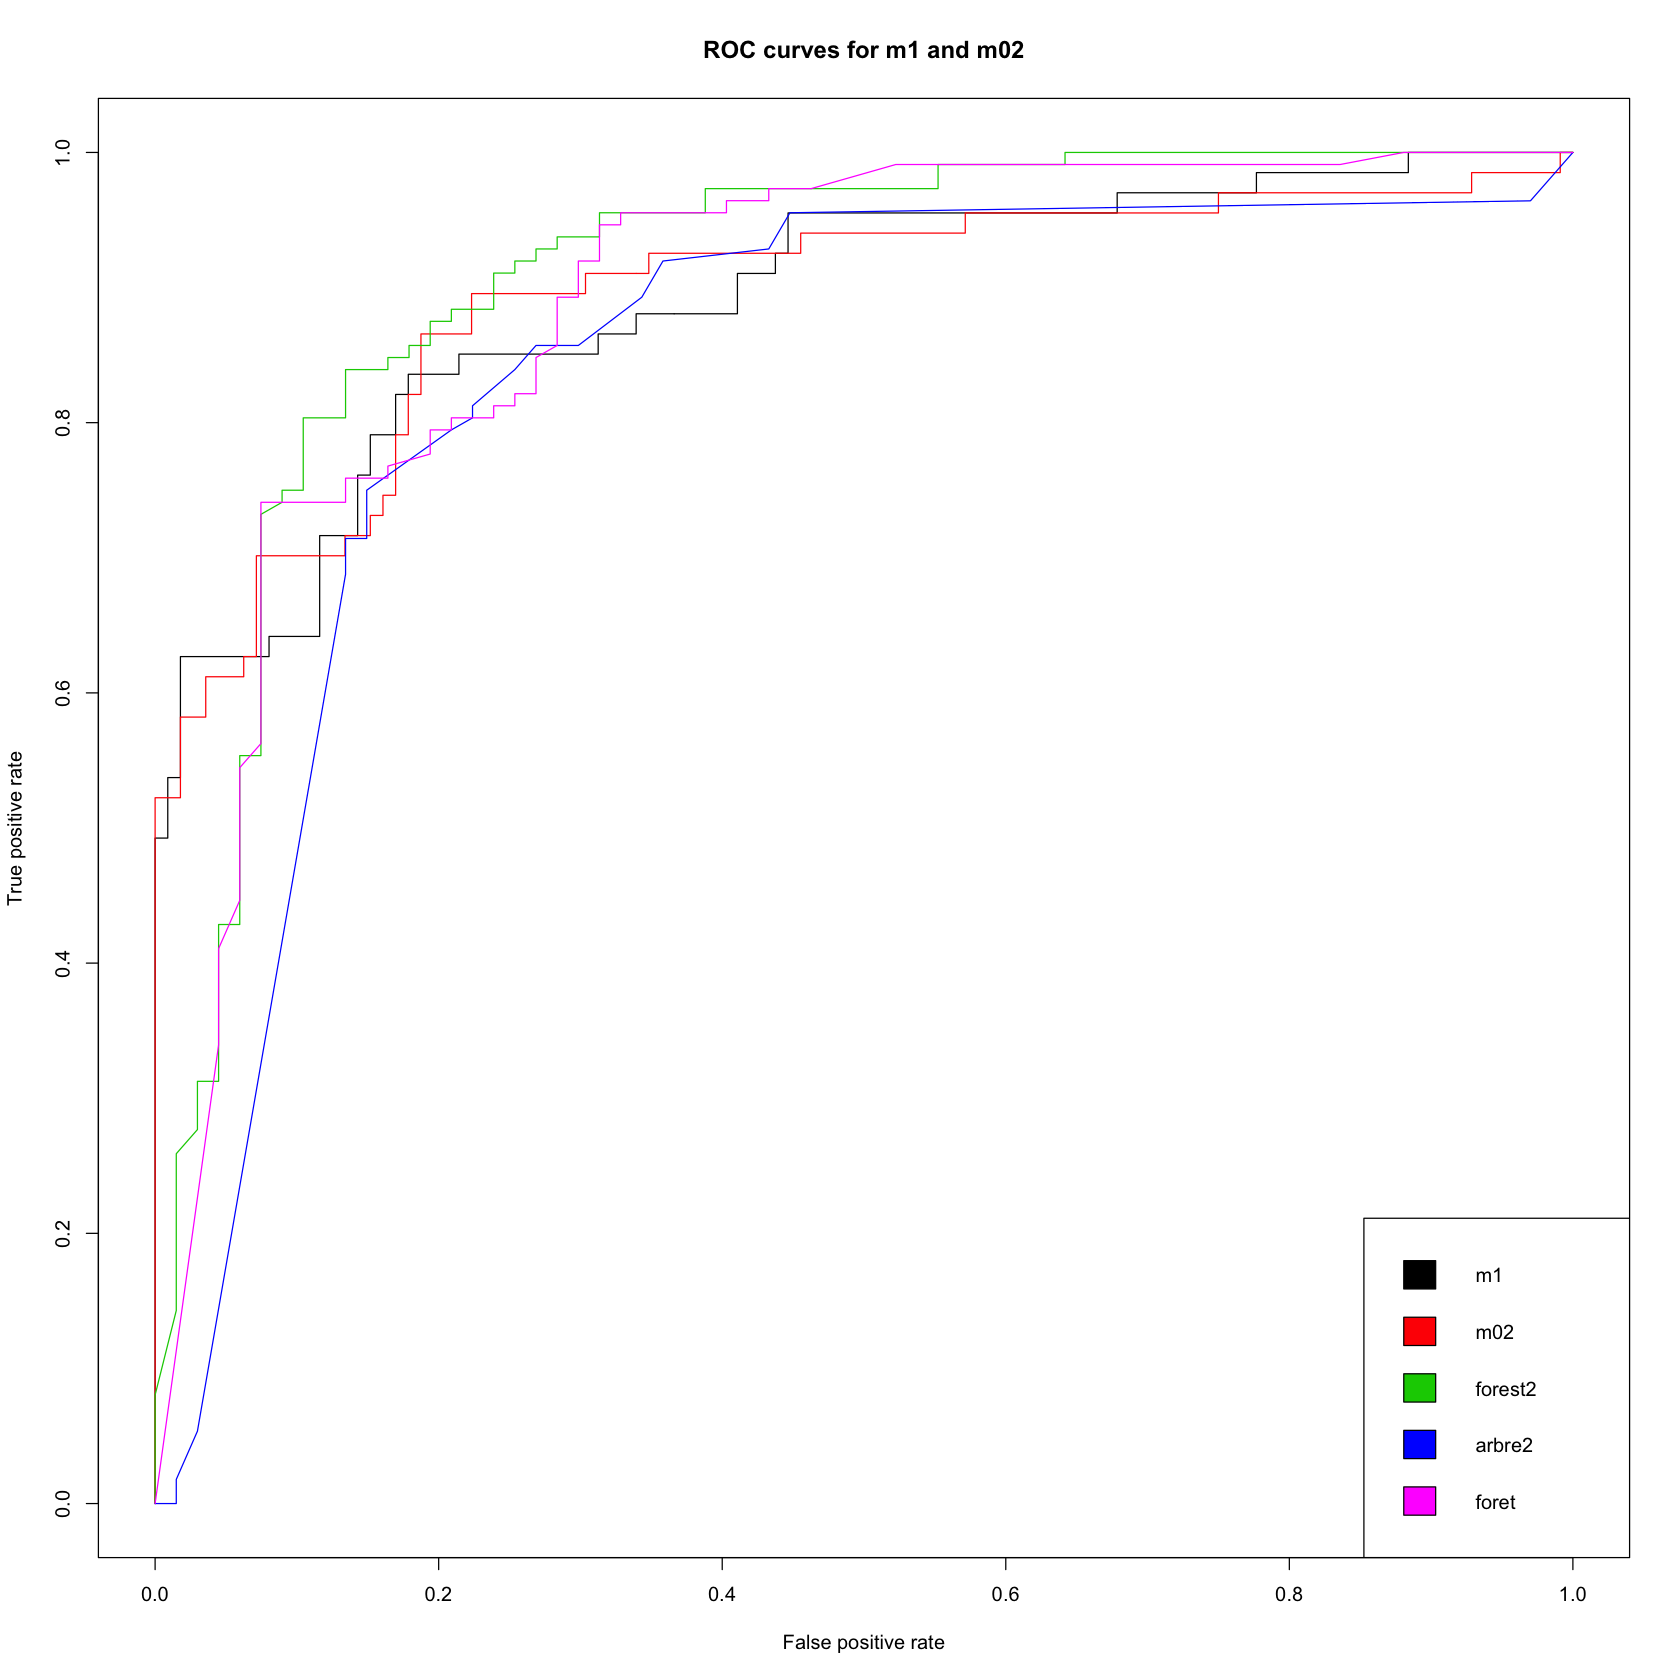

In [44]:
library(ROCR)



roclogitm1=predict(m1,newdata=datest2,type="response")

predlogitm1=prediction(roclogitm1,as.numeric(datest2[,"Survived"])-1)
perflogitm1=performance(predlogitm1, "tpr","fpr")




roclogitm02=predict(m02,newdata=datest2,type="response")

predlogitm02=prediction(roclogitm02,as.numeric(datest2[,"Survived"])-1)
perflogitm02=performance(predlogitm02, "tpr","fpr")

# Tracé de la courbe

# Arbre de décision
ptree2 <- predict(tree.c2, newdata = datest2, type = "prob")  
pROCtree2 <- prediction(ptree2[, 1], datest2$Survived)
perftree2 <- performance(pROCtree2, "tpr", "fpr")

# Foret
pforest2 <- rf.c2$test$votes
pROCforest2 <- prediction(pforest2[,1], datest2$Survived)
perfforest2 <- performance(pROCforest2, "tpr", "fpr")

plot(perflogitm1,main="ROC curves for m1 and m02",col=1)
plot(perflogitm02,col=2,add=TRUE)
plot(perfforest2,col=3,add=TRUE)
plot(perftree2,col=4,add=TRUE)
plot(perfforest,col=6,add=TRUE)

lbs1= c("m1", "m02","forest2","arbre2","foret")
legend(x="bottomright", legend= lbs1, cex=1, fill=c(1,2,3,4,6))


### Commentaire:

Utilisons notre fonction ROC point sur ces deux modèles.

In [45]:
Y2 = as.numeric(X[testi, "Survived"])-1;
roclogitm1=predict(m1,newdata=datest2,type="response")
predm02=predict(m02,newdata=datest2,type="response")

In [46]:
FP3=TP3=rep(NA,1001)
FP4=TP4=rep(NA,1001)
for(s in seq(0,1,by=.001)){
    Ps3=(roclogitm1>s)*1
    Ps4=(predm02>s)*1
    FP3[1+s*1000]=sum((Ps3==1)*(Y2==0))/sum(Y2==0)
    TP3[1+s*1000]=sum((Ps3==1)*(Y2==1))/sum(Y2==1)
    FP4[1+s*1000]=sum((Ps4==1)*(Y2==0))/sum(Y2==0)
    TP4[1+s*1000]=sum((Ps4==1)*(Y2==1))/sum(Y2==1)
}

Seuil 1 : 0.129 
Seuil 2 : 0.128

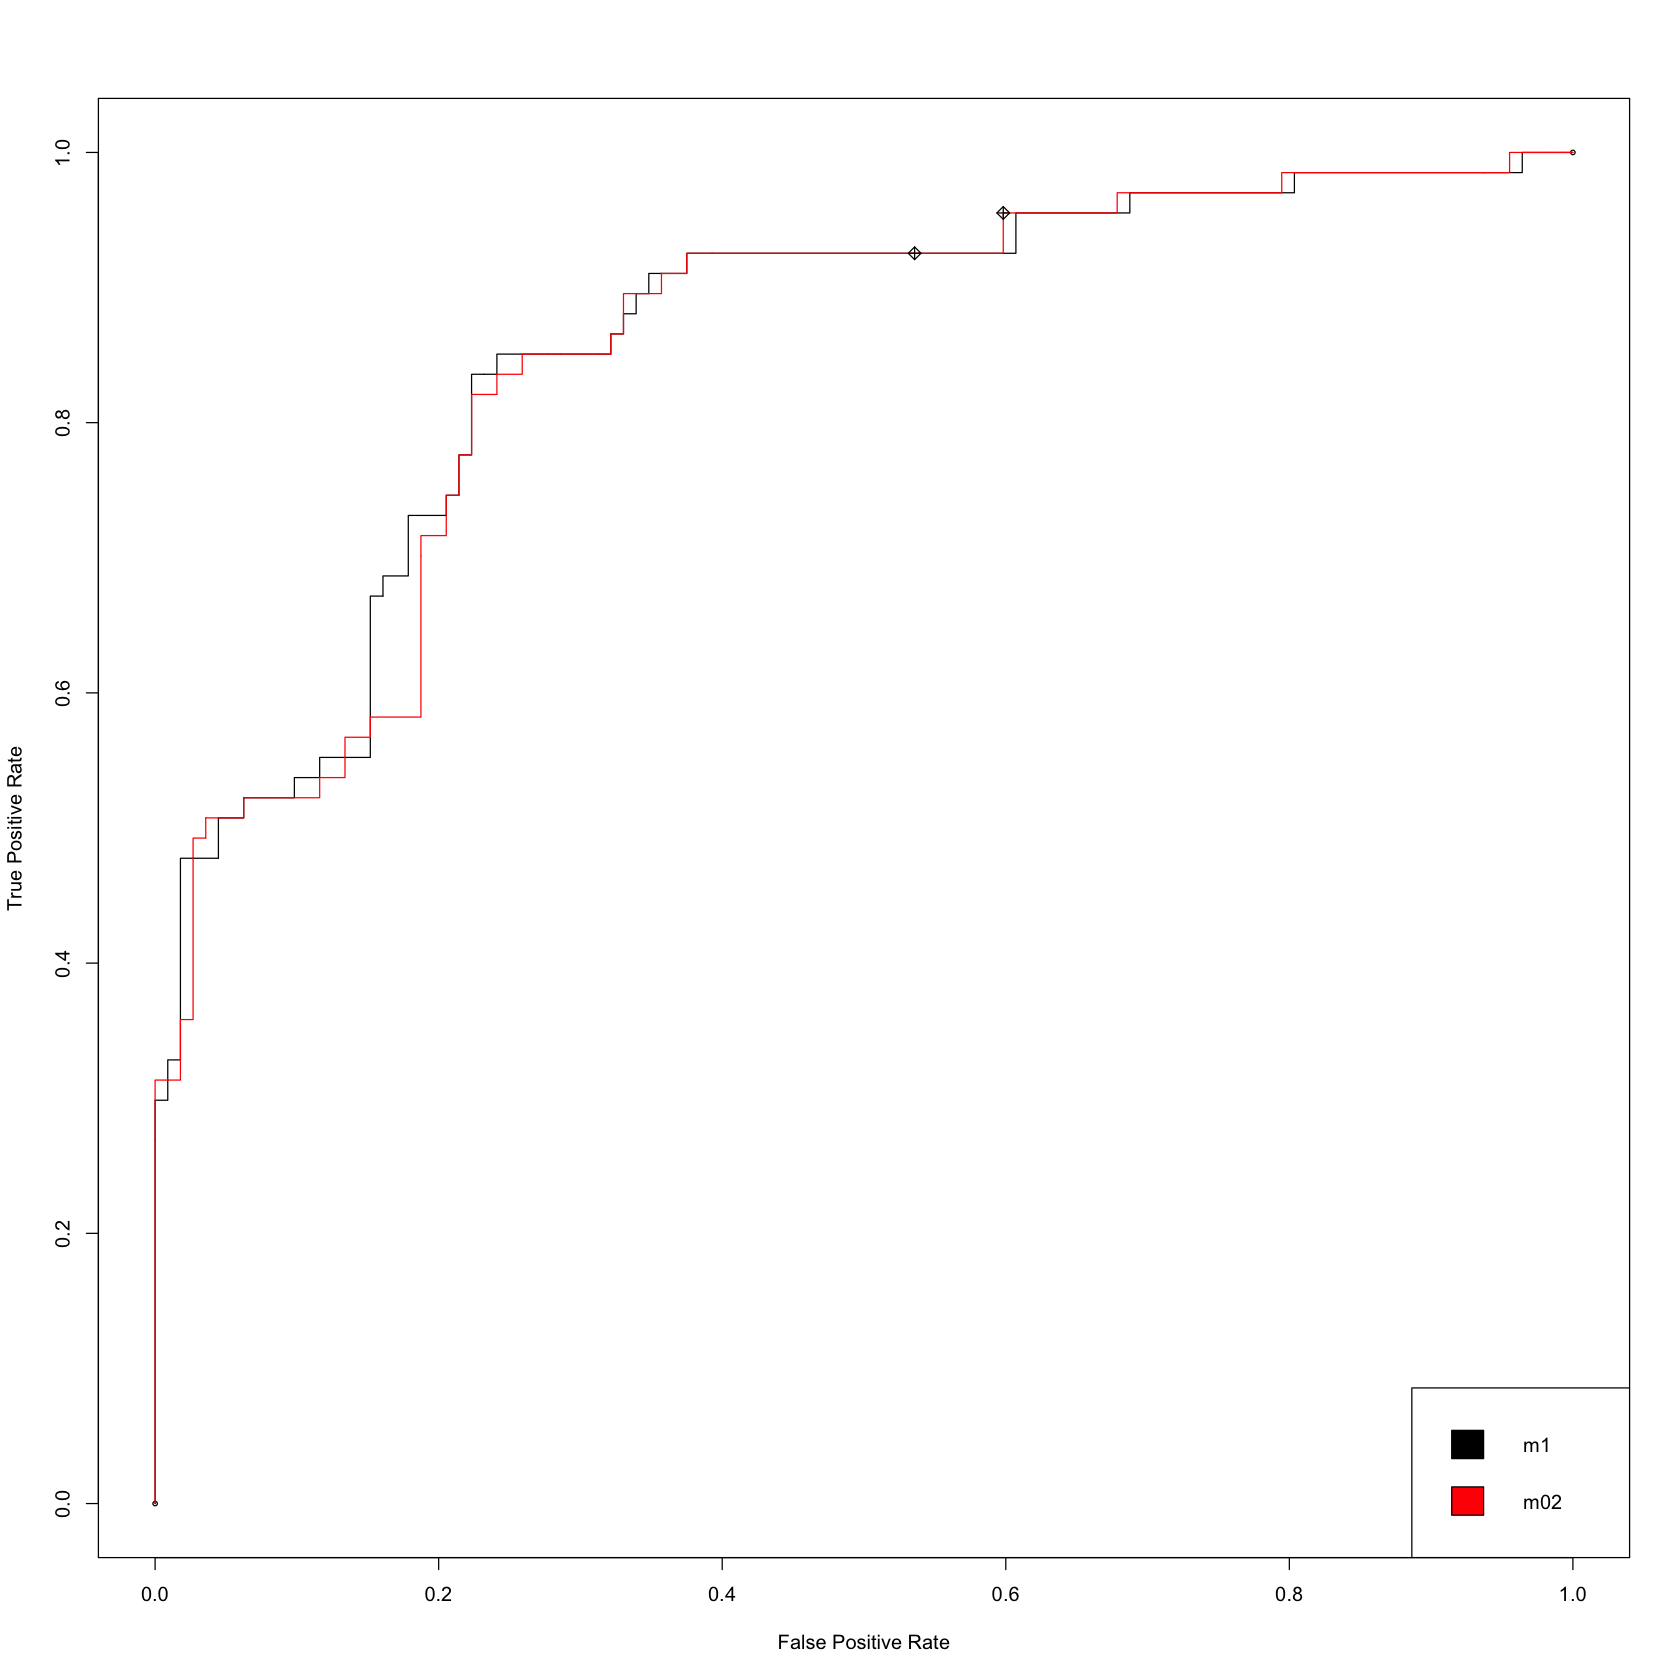

In [47]:
plot(0:1,0:1,xlab="False Positive Rate", ylab="True Positive Rate",cex=.5)

lines(c(FP),c(TP),type="S",col=1)
lines(c(FP2),c(TP2),type="S",col=2)
test1=ROC_point(0.6, FP,TP,FP2,TP2)
lbs= c("m1", "m02")
legend(x="bottomright", legend= lbs, cex=1, fill=c(1,2))

### Remarques:

On conclut d'après les courbes ROC que le modèle m02 est meilleur que m1. En effet, nous pouvons constater que la courbe rouge se situe généralement au dessus de la courbe noire: nous obtenons un taux de vrai positif supérieur pour le modèle m02 que pour le modèle m1.

Par ailleurs, en comparant les courbres ROC des deux forêts on se rend compte de l'importance de la variable Age dans la classification. En effet la courbe de la deuxième forêt est toujours au dessus de celle de la première forêt. (ce qui corrobore nos observations des taux de classification)


### Commentaire:

Nous avons observé que les taux de classifications de chaque modèle varient énormément d'une compilation à une autre. Ainsi nous avons décidé de faire une moyenne pour chaque taux avec un paramètre N. (ici N = 25)

In [48]:
moy_glm = list()
moy_best =list()
moy_naive =list()
moy_rf = list()
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(X2) # nombre de lignes dans les données
nvar <- ncol(X2) # nombre de colonnes
ntest <- ceiling(npop * test.ratio)
N =25

for (i in 1:N) {
    testi <- sample(1:npop, ntest)
    appri <- setdiff(1:npop, testi) 
    datappr2 <- X2[appri,] 
    datest2 <- X2[testi,] 

    ### GLM ###
    modglm = glm(Survived~ .^2,data=datappr2,family = binomial(link = "logit"))
    p <- predict(modglm, newdata = datest2, type = "response")
    tab <- table(pred.reg = p > 0.5, observations = datest2$Survived)
    moy_glm <- append(moy_glm, sum(diag(tab)) / sum(tab))
    

    ### best ###
    modbest=stepAIC(m02,~.,trace=FALSE, direction=c("backward"))
    p <- predict(modbest, newdata = datest2, type = "response")
    tab <- table(pred.reg = p > 0.5, observations = datest2$Survived)
    moy_best <- append(moy_best,sum(diag(tab)) / sum(tab))

    ### Naive ###
    modnaive=rpart(Survived~.,data=datappr2,control=rpart.control(cp=0.001))
    xmat2=xpred.rpart(modnaive, xval = 10)
    xerr2 <- (xmat2-as.numeric(datappr2[, "Survived"]))^2
    CVerr2=apply(xerr2,2,sum)
    cp_opti = as.numeric(attributes(which.min(CVerr2))$names);
    modnaive=rpart(Survived~.,data=datappr2,control=rpart.control(cp=cp_opti))
    p <- predict(modnaive, newdata = datest2, type = "class")
    tab2 = table(p, datest2[, "Survived"]);
    moy_naive <- append(moy_naive,sum(diag(tab2)) / sum(tab2))

    ### Random forest tree ###

    modrf <- randomForest(Survived ~ ., data = datappr2, 
                       xtest = datest2[,-1], ytest = datest2[,"Survived"],
                       ntree = 500, importance = TRUE,mtry=3)
    p <- modrf$test$predicted
    tab3 = table(p, datest2[, "Survived"]);
    moy_rf <- append(moy_rf,sum(diag(tab3)) / sum(tab3))
}

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [49]:
cat("Le taux de classification moyen pour le modèle complet" ,mean(as.numeric(moy_glm)) ,"\n")
cat("Le taux de classification moyen pour stepAIC du modèle complet" ,mean(as.numeric(moy_best)),"\n" )
cat("Le taux de classification moyen pour l'arbre de discrimination" ,mean(as.numeric(moy_naive)),"\n")
cat("Le taux de classification moyen pour la foret aléatoire" ,mean(as.numeric(moy_rf)),"\n")

Le taux de classification moyen pour le modèle complet 0.8174302 
Le taux de classification moyen pour stepAIC du modèle complet 0.8160894 
Le taux de classification moyen pour l'arbre de discrimination 0.8310615 
Le taux de classification moyen pour la foret aléatoire 0.8417877 


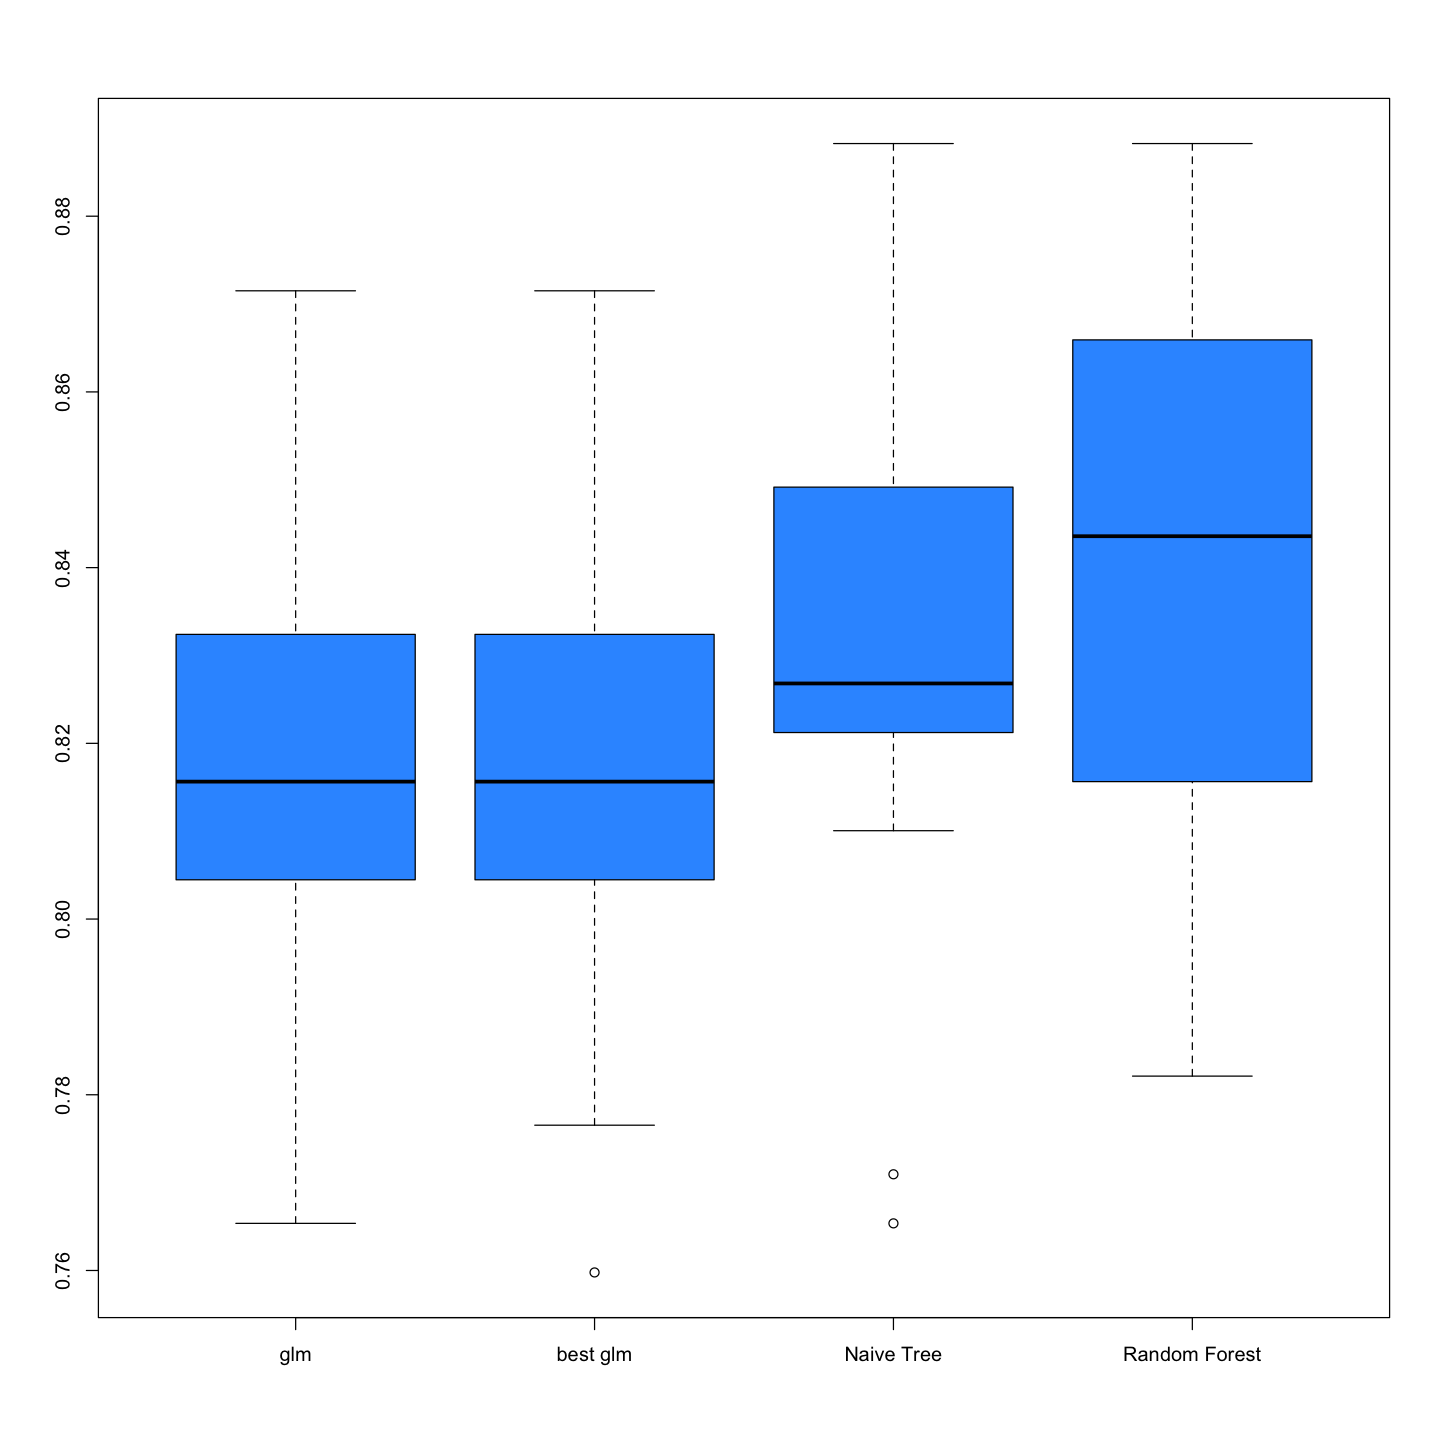

In [50]:
options(repr.plot.width=12, repr.plot.height=12)

boxplot(as.numeric(moy_glm),as.numeric(moy_best),as.numeric(moy_naive),as.numeric(moy_rf), 
        names=c("glm","best glm","Naive Tree","Random Forest"),
       col = '#3399FF')

On constate qu'en moyenne le modèle fait avec le random forest a toujours un taux de classification moyen plus haut que les autres. Ce modèle est donc dans ce cas là le plus fiable.

<font color='green'>
REMARQUES M.Roustant : Gros travail réalisé, bravo ! Des idées intéressantes (par ex l'idée d'afficher le seuil sur la courbe ROC), et de mesurer la variabilité des résultats sur 25 simulations. Quelques compléments rapides à réaliser :

* représenter aussi les courbes ROC pour l'arbre et la forêt (cf notebook 'starter' mis à jour sur moodle)
* régler le paramètre mtry de la forêt
* vérifier qu'il n'y a pas de bug dans votre programme calculant le seuil, car ce n'est pas normal de ne pas obtenir les mêmes courbes ROC qu'avec le package ROCR (mais j'ai peut-être raté quelque chose ?)

</font>

# ACP :

## Choix des variables à retenir :  

In [51]:
#on va prendre le jeu de données complété par missForest:
#summary(XnaImp$ximp)

x_acp2 <- XnaImp$ximp[,-c(2,3)]
summary(x_acp2)
str(x_acp2)
#Nous gardons volontairement la variable qualitative Survived

  Survived        Age            SibSp           Parch             Fare       
 dead :549   Min.   : 0.42   Min.   :0.000   Min.   :0.0000   Min.   :  0.00  
 alive:342   1st Qu.:22.00   1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:  7.91  
             Median :28.87   Median :0.000   Median :0.0000   Median : 14.45  
             Mean   :29.64   Mean   :0.523   Mean   :0.3816   Mean   : 32.20  
             3rd Qu.:36.00   3rd Qu.:1.000   3rd Qu.:0.0000   3rd Qu.: 31.00  
             Max.   :80.00   Max.   :8.000   Max.   :6.0000   Max.   :512.33  

'data.frame':	891 obs. of  5 variables:
 $ Survived: Factor w/ 2 levels "dead","alive": 1 2 2 2 1 1 1 1 2 2 ...
 $ Age     : num  22 38 26 35 35 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...


## ACP avec la fonction PCA

**Remarque :** Les variables n'étant pas dans les mêmes unités, nous faisons une ACP réduite.

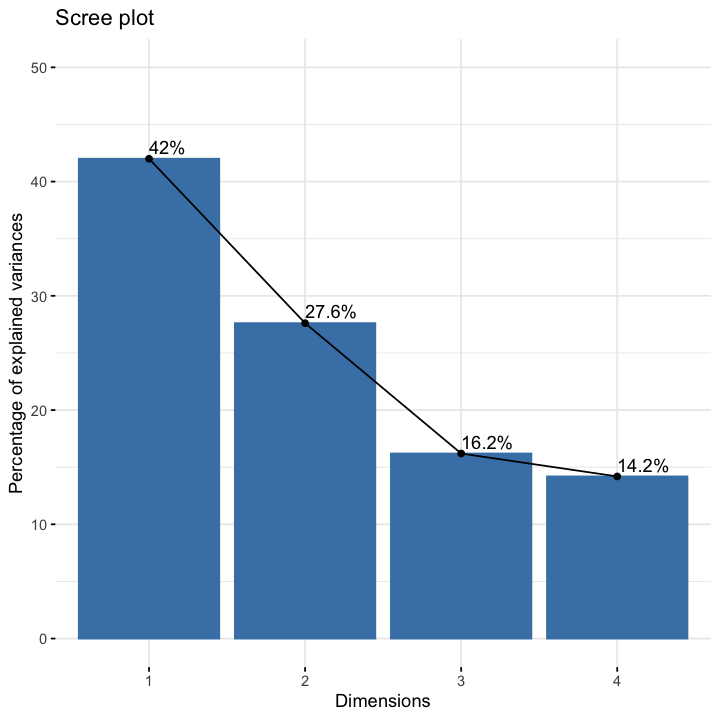

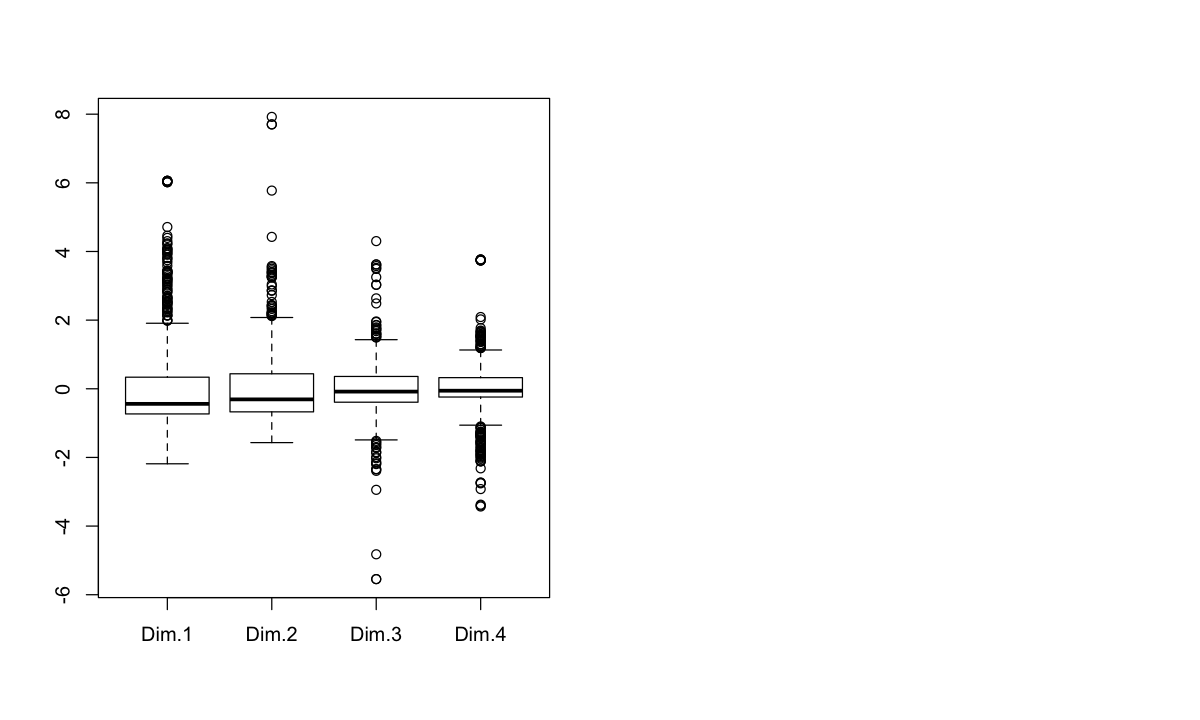

In [60]:
res.pca2 <-PCA(x_acp2, , scale.unit=TRUE, ncp=4, quali.sup=1, graph=FALSE)
par(mfrow=c(1,2))
options(repr.plot.width=6, repr.plot.height=6)
fviz_eig(res.pca2, addlabels = TRUE, ylim = c(0, 50), new.plot=FALSE, graph.type="classic")
#barplot(res.pca2$eig[,1],main="Eigenvalues",names.arg=1:nrow(res.pca$eig))
options(repr.plot.width=10, repr.plot.height=6)
boxplot(res.pca2$ind$coord)

**Remarque:** On voit que l'on peut garder les 2 premières composantes principales, car l'apport de la 3ème et de la 4ème semble bénin. (la différence de hauteur entre le 3ème et le 4ème ..... de l'histogramme est très faible)

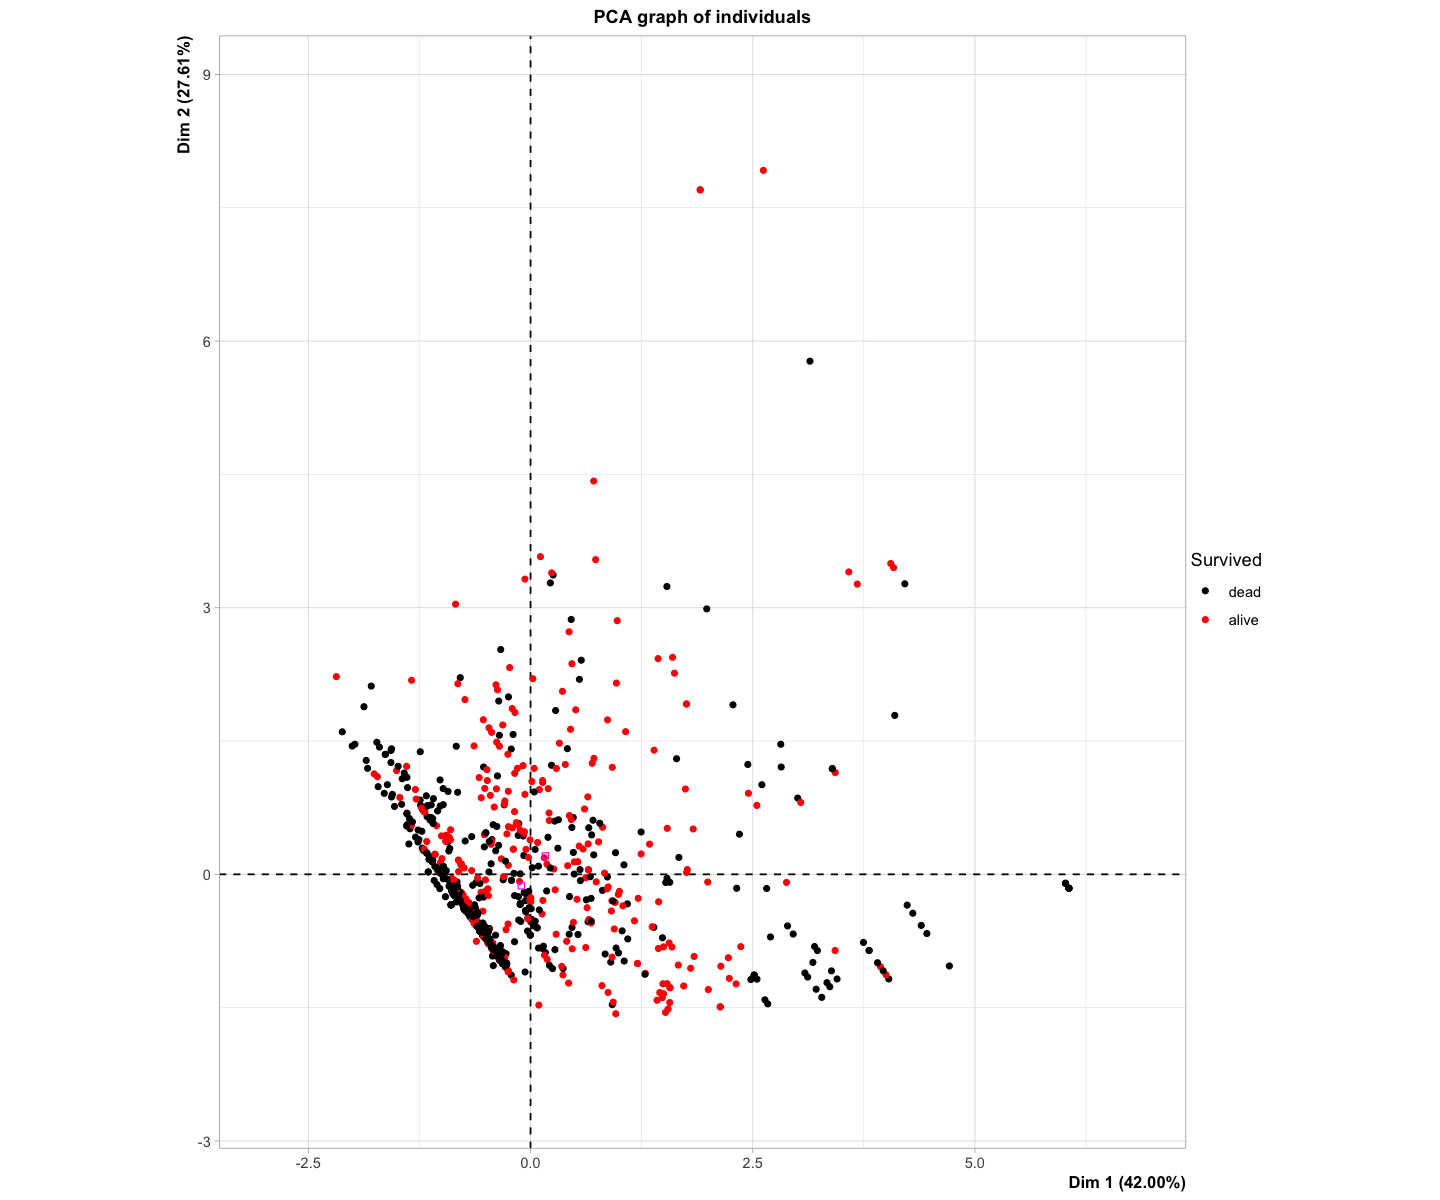

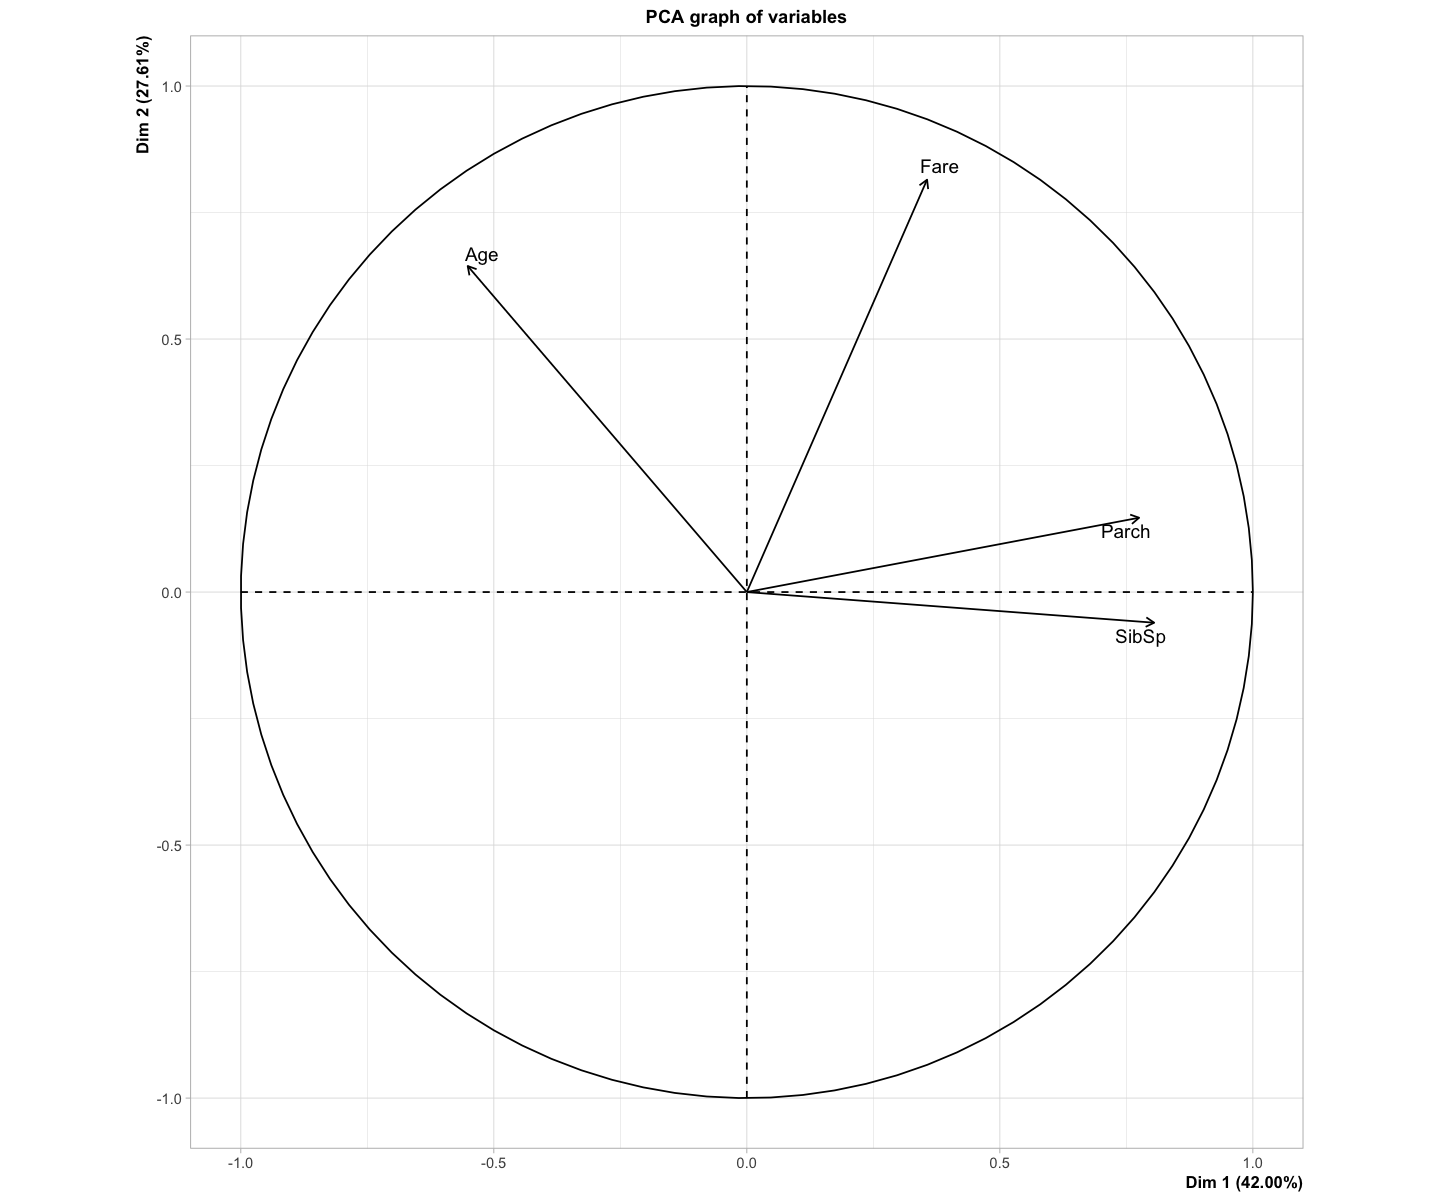

In [62]:
layout(matrix(1:2,1,2))
#par(mfrow=c(1,2))
options(repr.plot.width=12, repr.plot.height=10)
plot(res.pca2,choix="ind", label="none", habillage="Survived", new.plot=FALSE, graph.type="ggplot")
plot(res.pca2,choix="var", new.plot=FALSE, graph.type="ggplot")

On peut maintenant essayer de visualiser parmi la représentation avec les composantes principales, les individus qui ont survécu ou non.

**Bilan :** 
Nous voyons donc que l'Axe 1 est porté très fortement par les variables Parch (Nombre d'enfants et de parents de l'individu à bord ) et SibSp(nombre de frères et soeurs et d'épouse à bord de l'individu)
L'Axe 2 est porté par les variables Fare (prix du billet) et Age

Donc l'axe 1 représente la quantité de proches que l'individu possède à bord et l'axe 2 l'age et le prix.

NB : il est intéressant de noter que l'on retrouve les deux points rouges en haut correspondant aux deux individus agés qui ont payés chers et sont venus seuls et qui ont survécu.